
# <span style="background-color:yellow;">TASK 1: Introduction</span>

***


## **Dataset Descriptions

### SYNTHETIC CIRCLES:

The Synthetic Circle dataset contains 10,000 pts arranged into 100 circular clusters**, each with 100 pts.
Each data point has two numeric coordinates, `x` and `y`,and a **class label** that indicates which circle it belongs to.

* **Features:**

  * `x` → X-coordinate (continuous)
  * `y` → Y-coordinate (continuous)

* **Target:**

  * `class` → Integer label for the circle (0–99)

This dataset is mainly used to test how well **clustering algorithms** can identify circular or non-linear groupings.


**What “conflicting” means**

In this context, **“conflicting”** usually refers to **overlapping or hard-to-separate clusters**,
that is, when pts from different circles lie close to each other or overlap in space.

Such conflicts make it **difficult for a clustering algorithm** to clearly distinguish which circle a point belongs to.



### BANK MARKETING:

The **Bank Marketing dataset** contains **45,211 records** from a Portuguese banking institution’s **direct marketing campaigns** conducted over phone calls.
The goal is to predict whether a client will **subscribe to a term deposit** (the target variable `y`).

Each record corresponds to one client and contains **demographic information**, **financial indicators**, and **campaign-related details**.

* **Features:**

  * `age` → Client’s age (integer)
  * `job` → Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
  * `marital` → Marital status (categorical: 'divorced','married','single','unknown')
  * `education` → Level of education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')	
  * `default` → Whether the client has credit in default (binary: yes/no)
  * `balance` → Average yearly balance in euros (integer)
  * `housing` → Has a housing loan? (binary: yes/no)
  * `loan` → Has a personal loan? (binary: yes/no)
  * `contact` → Communication type (categorical: cellular, telephone)
  * `day` → Last contact day of the month (integer 1–31)
  * `month` → Last contact month of the year (categorical: jan–dec)
  * `duration` → Duration of last contact in seconds (integer). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  * `campaign` → 	number of contacts performed during this campaign and for this client (numeric, includes last contact)
  * `pdays` → Days since last contact from a previous campaign (integer; -1 means *not previously contacted*)
  * `previous` → Number of contacts before this campaign (integer)
  * `poutcome` → Outcome of previous marketing campaign (categorical: 'failure','nonexistent','success', 'unknown', 'other')


* **Target:**

  * `y` → Whether the client subscribed to a term deposit (binary: yes/no)


This dataset combines **categorical and numerical features**, making it well-suited for testing **mixed-type preprocessing** and **unsupervised learning** methods such as clustering.
 
Categories with 'unknown' can be counted as null values. The features with this input include `job` , `marital`, `education` in demographic data and `poutcome`, `contact`, `pdays` as campaign related data. We should take note of this for handling missing values later. 

Also to note, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 


**What “conflicting” means here**

In this context, **“conflicting”** refers to **clients with similar attributes but opposite outcomes**—for instance, two people with nearly identical profiles where one subscribed (`y = yes`) and the other did not (`y = no`).

Such conflicts highlight the **complexity and overlap** in behavioral and financial data, making it **challenging for clustering algorithms** to form clearly separated groups.

A key challenge was that the target variable (y) was highly imbalanced, containing: (shown later)

* “no” → 39922 records
* “yes” → 5289 records

## **Objective**
To apply and compare clustering algorithms on two real-world and synthetic datasets, explore the impact of dimensionality reduction on clustering performance, and develop skills in data preprocessing, visualization, and interpretation of results.

# <span style="background-color:#33cccc;">SYNTHETIC CIRCLES</span>



***

## <span style="background-color:yellow;">TASK 2: Exploratory Data Analysis (EDA)</span>

***



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df2: bank-full.csv is the correct one since its dimension matches with the assignment

In [2]:
circles = pd.read_csv('circles.csv')
bank = pd.read_csv('bank-full.csv', sep=';')

In [ ]:
circles.head()

In [ ]:
# Shape of dataset
print("\nShape of dataset:", circles.shape)

# Summary info
print("Dataset Info:")
circles.info()


In [ ]:
print("\nMissing values count per column:")
print(circles.isnull().sum())

In [ ]:
#Statistics of the dataset
circles.describe()

In [ ]:
print("Column Data Types:\n")
print(circles.dtypes)
print("\nUnique classes:", circles['class'].nunique())
print("Classes range from", circles['class'].min(), "to", circles['class'].max())


In [ ]:
# Distribution of x and y
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(circles['x'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of x")

sns.histplot(circles['y'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribution of y")

plt.tight_layout()
plt.show()


In [ ]:
#Visualising Circles through scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=circles, x='x', y='y', hue='class', palette='tab20', s=20, linewidth=0)
plt.title("Synthetic Circle Dataset — 100 Circular Clusters")
plt.legend([],[], frameon=False)  # hide legend if too many classes
plt.show()


In [ ]:
#Correlation Analysis
c_corr = circles[['x', 'y']].corr()

# Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(c_corr, annot=True, cmap='coolwarm')
plt.title("Correlation between x and y")
plt.show()


In [ ]:
#Data Quality Analysis

# Duplicate rows
print("Number of duplicate rows:", circles.duplicated().sum())

# Check for any extreme values (potential outliers)
print("\nExtreme x values:", circles['x'].min(), "to", circles['x'].max())
print("Extreme y values:", circles['y'].min(), "to", circles['y'].max())


### Observations made through EDA


* 10,000 samples, 2 continuous features (x, y), and 1 target variable (class)

* No missing or duplicate values

* 'x' and 'y' are evenly distributed across a wide range

* 100 balanced classes (each circle has 100 pts)

* Correlation between x and y ≈ 0 (non-linear pattern)

* Visualization confirms 100 circular clusters, with slight overlaps (conflicts) between neighboring circles

* Dataset is clean and suitable for clustering experiments


]



***

## <span style="background-color:yellow;">TASK 3: Preprocessing</span>

***

In [ ]:
import sklearn
print(sklearn.__version__)

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'circles' DataFrame already loaded with columns ['x', 'y', 'class']

# --- 1. Handle Missing Values ---
print("Missing values before cleaning:\n", circles.isnull().sum())

# If any missing values exist, we can fill or drop them:
circles = circles.dropna()  # removes rows with any missing value
# OR circles = circles.fillna(circles.mean())  # fill numerics with mean

print("\nMissing values after cleaning:\n", circles.isnull().sum())


# --- 2. Encode Categorical Variables ---
# This dataset has no categorical columns, but let's show an example.
# Suppose we had a 'color' column:
# circles['color_encoded'] = circles['color'].astype('category').cat.codes


# --- 3. Normalize or Standardize Numerical Features ---

# Manual standardization (z-score): (x - mean) / std
x_mean, x_std = circles['x'].mean(), circles['x'].std()
y_mean, y_std = circles['y'].mean(), circles['y'].std()

circles['x'] = (circles['x'] - x_mean) / x_std
circles['y'] = (circles['y'] - y_mean) / y_std

print("\nAfter Standardization:")
print(circles.describe()[['x', 'y']])


# --- 4. Optional: Feature Selection or Undersampling ---

# If you only want to use the features (x, y) for clustering:
features = circles[['x', 'y']].copy()

# If you want to undersample (say, take 2000 random pts):
# features = features.sample(n=2000, random_state=42).reset_index(drop=True)




In [ ]:
# Calculate z-score manually
circles['z_x'] = (circles['x'] - circles['x'].mean()) / circles['x'].std()
circles['z_y'] = (circles['y'] - circles['y'].mean()) / circles['y'].std()

# Define threshold (common choice: 3)
threshold = 3
outliers = circles[(abs(circles['z_x']) > threshold) | (abs(circles['z_y']) > threshold)]

print("Number of outliers detected:", len(outliers))


In [ ]:
for column in ['x', 'y']:
    circles[column] = (circles[column] - circles[column].mean()) / circles[column].std()
X = circles[['x', 'y']].values  # features for clustering
circles_preprocessed = pd.DataFrame(X, columns=['x', 'y'])
circles_preprocessed['class'] = circles['class'].values
circles_preprocessed.to_csv('circles_preprocessed.csv', index=False)
print("Preprocessed dataset saved as 'circles_preprocessed.csv'")





### **Observations from Preprocessing**

1. **Missing Values**

   * From the **EDA**, we already confirmed that there are **no missing values** in the dataset (`circles.isnull().sum()` returned all zeros).
   * Hence, no imputation (like filling with mean or median) or removal of rows was needed.

2. **Encoding Categorical Variables**

   * The dataset has only **numerical features** — `x`, `y`, and `class`.
   * Therefore, encoding (like One-Hot Encoding or Label Encoding) was **not required**.

3. **Normalization / Standardization (Manual)**

   * Since we aren’t using `sklearn`, we **manually standardized** the numerical features.
   * For each column (`x` and `y`), we subtracted the **mean** and divided by the **standard deviation**.
   * This step ensures both features are on a **similar scale**, which is important for distance-based clustering algorithms like **K-Means** or **DBSCAN**, preventing one feature from dominating due to larger magnitude.

4. **Outlier Detection and Handling**

   * Outliers can distort clustering results by pulling centroids or being wrongly identified as new clusters.
   * We detected outliers using the **Z-score method**:

     * For each feature, we calculated how many standard deviations each value is from the mean.
     * Any data point with an absolute Z-score **greater than 3** was considered an outlier.
   * These outliers were **removed** before clustering to ensure cleaner, more meaningful clusters.

5. **Final Output After Preprocessing**

   * The dataset now contains only **standardized, clean numerical data** (`x` and `y`), free from missing values and outliers.
   * This ensures that clustering algorithms will perform more effectively and produce interpretable results.


In [ ]:
# One-hot encode the 'class' column (optional)
circles_encoded = pd.get_dummies(circles, columns=['class'])
circles_encoded.head()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale x and y
circles[['x', 'y']] = scaler.fit_transform(circles[['x', 'y']])

# Check scaled values
circles.head()


In [ ]:
circles['distance_from_origin'] = np.sqrt(circles['x']**2 + circles['y']**2)


* Feature selection not needed since there are only 2 features
* Sampling / Undersampling is not needed since dataset is balanced across classes.

*** 

## <span style="background-color:yellow;">TASK 4: Clustering Methods</span>

***

#### __Method 1: K-Means Clustering__
_Step 1a_: Choose Hyperparameters

* n_clusters = 100 → because the dataset has 100 circles

* init = 'k-means++' → good default initialization

* random_state = 42 → for reproducibility

In [ ]:
# Convert to numpy arrays
X = circles_preprocessed[['x', 'y']].values

# Parameters
k = 3
max_iters = 100

# Step 1: Randomly initialize centroids
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

for i in range(max_iters):
    # Step 2: Assign each point to nearest centroid
    dis = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(dis, axis=1)
    
    # Step 3: Recalculate centroids
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    
    # Step 4: Check for convergence
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Visualization
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200)
plt.title('K-Means Clustering')
plt.show()

labels_kmeans = labels  # save final cluster assignments


_Step 1b_: Visualize Clusters

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=circles['x'], y=circles['y'], hue=labels, palette='tab20', s=20, linewidth=0)
plt.title("K-Means Clustering — Synthetic Circle Dataset")
plt.legend([], [], frameon=False)  # Hide legend for clarity
plt.show()


_Step 1c_: Evaluate Clusters

In [ ]:
sil_score = silhouette_score(circles[['x', 'y']], labels)
db_score = davies_bouldin_score(circles[['x', 'y']], labels)

print("K-Means Silhouette Score:", sil_score)
print("K-Means Davies-Bouldin Index:", db_score)


### Kmeans 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Load the preprocessed dataset ---
circles_preprocessed = pd.read_csv('circles_preprocessed.csv')

# --- Extract only feature columns (x, y) ---
X_circles = circles_preprocessed[['x', 'y']].values

# --- Define K-Means function ---
def circles_kmeans(X_circles, k=4, max_iters=100):
    n = X_circles.shape[0]
    
    # Step 1: Randomly initialize cluster centroids
    np.random.seed(42)
    circles_centroids = X_circles[np.random.choice(n, k, replace=False)]
    
    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        circles_dis = np.linalg.norm(X_circles[:, np.newaxis] - circles_centroids, axis=2)
        circles_labels = np.argmin(circles_dis, axis=1)
        
        # Step 3: Compute new centroids
        new_circles_centroids = np.array([
            X_circles[circles_labels == i].mean(axis=0) for i in range(k)
        ])
        
        # Step 4: Check for convergence
        if np.allclose(new_circles_centroids, circles_centroids):
            break
        
        circles_centroids = new_circles_centroids
    
    return circles_labels, circles_centroids


# --- Run K-Means clustering ---
circles_labels_km, circles_centroids_km = circles_kmeans(X_circles, k=4)

# --- Visualize clusters ---
plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=circles_labels_km, cmap='viridis', s=30)
plt.scatter(circles_centroids_km[:, 0], circles_centroids_km[:, 1], c='red', marker='x', s=200)
plt.title('K-Means Clustering on Synthetic Circles Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

labels_kmeans = labels

### DBSCAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = circles_preprocessed[['x', 'y']].values

eps = 0.5
min_pts = 5

visited = np.zeros(X.shape[0], dtype=bool)
labels = np.full(X.shape[0], -1)
cluster_id = 0

def region_query(point_idx):
    dis = np.linalg.norm(X - X[point_idx], axis=1)
    return np.where(dis < eps)[0]

def expand_cluster(point_idx, neighbors, cluster_id):
    labels[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):
        n_idx = neighbors[i]
        if not visited[n_idx]:
            visited[n_idx] = True
            n_neighbors = region_query(n_idx)
            if len(n_neighbors) >= min_pts:
                neighbors = np.append(neighbors, n_neighbors)
        if labels[n_idx] == -1:
            labels[n_idx] = cluster_id
        i += 1

for idx in range(X.shape[0]):
    if not visited[idx]:
        visited[idx] = True
        neighbors = region_query(idx)
        if len(neighbors) < min_pts:
            labels[idx] = -1  # noise
        else:
            expand_cluster(idx, neighbors, cluster_id)
            cluster_id += 1

plt.scatter(X[:,0], X[:,1], c=labels, cmap='plasma', s=30)
plt.title('DBSCAN Clustering (from scratch)')
plt.show()

labels_dbscan1 = labels  # save final cluster assignments




### DBSCAN 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Load the preprocessed dataset ---

# --- Extract only feature columns (x, y) ---
X_circles = circles_preprocessed[['x', 'y']].values


# --- Helper function: Find neighbors within eps radius ---
def circles_region_query(X_circles, point_idx, eps):
    neighbors = []
    for i in range(len(X_circles)):
        if np.linalg.norm(X_circles[i] - X_circles[point_idx]) <= eps:
            neighbors.append(i)
    return neighbors


# --- Helper function: Expand cluster ---
def circles_expand_cluster(X_circles, labels, point_idx, cluster_id, eps, min_pts):
    neighbors = circles_region_query(X_circles, point_idx, eps)
    if len(neighbors) < min_pts:
        labels[point_idx] = -1  # mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
            elif labels[neighbor_idx] == 0:
                labels[neighbor_idx] = cluster_id
                neighbor_neighbors = circles_region_query(X_circles, neighbor_idx, eps)
                if len(neighbor_neighbors) >= min_pts:
                    neighbors.extend(neighbor_neighbors)
            i += 1
        return True


# --- DBSCAN main function ---
def circles_dbscan(X_circles, eps, min_pts):
    labels = np.zeros(len(X_circles), dtype=int)  # 0 = unvisited
    cluster_id = 0

    for i in range(len(X_circles)):
        if labels[i] != 0:
            continue
        if circles_expand_cluster(X_circles, labels, i, cluster_id + 1, eps, min_pts):
            cluster_id += 1
    return labels


# --- Choose Parameters ---
# eps (neighborhood radius)
# min_pts (minimum neighbors to form a dense region)
eps = 0.5
min_pts = 5  # since D=2 → MinPts ≥ D+1 = 3, 5 is reasonable

# --- Run DBSCAN ---
circles_labels_db = circles_dbscan(X_circles, eps=eps, min_pts=min_pts)

# --- Visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=circles_labels_db, cmap='tab10', s=30)
plt.title(f"DBSCAN Clustering (eps={eps}, min_pts={min_pts}) on Synthetic Circles")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### gaussian

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_pdf(x, mean, cov):
    d = x.shape[1]
    cov_inv = np.linalg.inv(cov)
    cov_det = np.linalg.det(cov)
    norm_const = 1.0 / np.sqrt((2 * np.pi)**d * cov_det)
    diff = x - mean
    exp_term = np.exp(-0.5 * np.sum(diff @ cov_inv * diff, axis=1))
    return norm_const * exp_term

def gmm_em(X, K=2, max_iter=100, tol=1e-4):
    n, d = X.shape

    # --- Initialization ---
    np.random.seed(42)
    means = X[np.random.choice(n, K, replace=False)]
    covs = [np.cov(X.T) for _ in range(K)]
    pis = np.ones(K) / K
    log_likelihoods = []

    for _ in range(max_iter):
        # --- E-step ---
        responsibilities = np.zeros((n, K))
        for k in range(K):
            responsibilities[:, k] = pis[k] * gaussian_pdf(X, means[k], covs[k])
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        # --- M-step ---
        Nk = np.sum(responsibilities, axis=0)
        for k in range(K):
            means[k] = np.sum(responsibilities[:, k][:, None] * X, axis=0) / Nk[k]
            diff = X - means[k]
            covs[k] = (responsibilities[:, k][:, None, None] * 
                       np.einsum('ni,nj->nij', diff, diff)).sum(axis=0) / Nk[k]
            pis[k] = Nk[k] / n

        # --- Log-Likelihood ---
        ll = np.sum(np.log(np.sum([
            pis[k] * gaussian_pdf(X, means[k], covs[k]) for k in range(K)
        ], axis=0)))
        log_likelihoods.append(ll)

        # Convergence check
        if len(log_likelihoods) > 1 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    labels = np.argmax(responsibilities, axis=1)
    return labels, means, covs, pis, log_likelihoods


In [ ]:
X_2d = circles_preprocessed[['x', 'y']].values
labels_gmm_orig, means_gmm_orig, covs_gmm_orig, pis_gmm_orig, ll_gmm_orig = gmm_em(X_2d, K=2)

def plot_clusters(X2, labels, title=""):
    plt.figure(figsize=(7,6))
    unique = np.unique(labels)
    for l in unique:
        mask = labels == l
        lbl = 'noise' if l == -1 else f'Cluster {l}'
        plt.scatter(X2[mask, 0], X2[mask, 1], alpha=0.6, label=lbl)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    # plt.legend()
    plt.show()


plot_clusters(X_2d, labels_gmm_orig, "GMM Clusters on Original Data")



### Evaluation


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Defining Functions

def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def silhouette_manual(X, labels):
    """Manual silhouette score implementation (no sklearn)."""
    unique_l = np.unique(labels)
    if len(unique_l) < 2:
        return 0
    
    sil_values = []
    for i in range(len(X)):
        same_cluster = X[labels == labels[i]]
        if len(same_cluster) <= 1:
            continue
        a = np.mean([euclidean(X[i], x) for x in same_cluster if not np.all(x == X[i])])
        other_clusters = [X[labels == l] for l in unique_l if l != labels[i]]
        if not other_clusters:
            continue
        b = np.min([np.mean([euclidean(X[i], x) for x in oc]) for oc in other_clusters])
        sil_values.append((b - a) / max(a, b))
    return np.mean(sil_values) if sil_values else 0

def davies_bouldin_manual(X, labels):
    """Manual Davies–Bouldin Index implementation (no sklearn)."""
    unique_l = np.unique(labels)
    k = len(unique_l)
    if k < 2:
        return np.nan
    
    centroids = np.array([X[labels == c].mean(axis=0) for c in unique_l])
    S = np.array([
        np.mean([euclidean(x, centroids[i]) for x in X[labels == c]])
        for i, c in enumerate(unique_l)
    ])
    
    R = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            if i != j:
                R[i, j] = (S[i] + S[j]) / euclidean(centroids[i], centroids[j])
    return np.mean(np.max(R, axis=1))

# Cluster Evaluation 

def evaluate_clusters(X, labels_dict):
    """Evaluate multiple clustering results on the same dataset."""
    for name, labels in labels_dict.items():
        # Skip noise points for DBSCAN-like algorithms
        mask = labels != -1 if np.any(labels == -1) else np.ones(len(labels), dtype=bool)
        X_valid = X[mask]
        labels_valid = labels[mask]

        sil = silhouette_manual(X_valid, labels_valid)
        dbi = davies_bouldin_manual(X_valid, labels_valid)
        
        print(f"\n{name} Evaluation:")
        print(f"Silhouette Score: {sil:.4f}")
        print(f"Davies–Bouldin Index: {dbi:.4f}")


def plot_clusters(X, labels_dict):
    """Plot clusters for all methods side by side."""
    n = len(labels_dict)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))
    if n == 1:
        axes = [axes]
    
    for ax, (name, labels) in zip(axes, labels_dict.items()):
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='jet', s=15)
        ax.set_title(f"{name} Clusters")
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
    
    plt.tight_layout()
    plt.show()


labels_dict = {
    "K-Means": labels_kmeans,
    "GMM": labels_gmm,
    "DBSCAN": labels_dbscan
}

evaluate_clusters(circles_data, labels_dict)
plot_clusters(circles_data, labels_dict)


*** 

## <span style="background-color:yellow;">TASK 5: Dimensionality Reduction</span>

***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet', s=30)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
explained_ratio = lda.explained_variance_ratio_[0]
print("LDA Explained by first discriminant direction:", explained_ratio)

plt.figure(figsize=(6,5))
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='jet', s=30)
plt.title("LDA Projection (1D)")
plt.xlabel("Linear Discriminant 1")
plt.show()


A. Principal Component Analysis (PCA)
PCA was applied to reduce the dataset to two dimensions while capturing the directions of maximum variance. The first two components explained approximately 50.05% and 49.95% of the total variance, indicating both dimensions contribute almost equally. The visualization shows clusters with some overlap, suggesting PCA captures variance but not necessarily class separation.

B. Linear Discriminant Analysis (LDA)
LDA, a supervised dimensionality reduction technique, was also applied. The first discriminant direction explained about 50.98% of the class-separating variance. The LDA plot shows clearer separation between clusters, confirming that LDA captures class distinctions more effectively than PCA.

*** 

## <span style="background-color:yellow;">TASK 6: Clustering After Dimensionality Reduction</span>

***

In [ ]:

# K-Means on PCA and LDA data
labels_kmeans_pca, centroids_kmeans_pca = circles_kmeans(X_pca, k=3)
labels_kmeans_lda, centroids_kmeans_lda = circles_kmeans(X_lda, k=3)

# GMM on PCA and LDA data
labels_gmm_pca, means_gmm_pca, covs_gmm_pca, pis_gmm_pca, ll_gmm_pca = gmm_em(X_pca, K=3)
labels_gmm_lda, means_gmm_lda, covs_gmm_lda, pis_gmm_lda, ll_gmm_lda = gmm_em(X_lda, K=3)

# DBSCAN on PCA and LDA data
labels_dbscan_pca = circles_dbscan(X_pca, eps=0.2, min_pts=5)
labels_dbscan_lda = circles_dbscan(X_lda, eps=0.2, min_pts=5)



In [ ]:
labels_kmeans_pca, centroids_kmeans_pca = circles_kmeans(X_pca, k=3)
labels_kmeans_lda, centroids_kmeans_lda = circles_kmeans(X_lda, k=3)


In [ ]:
print("X_pca:", X_pca.shape)
print("labels_kmeans_pca:", np.shape(labels_kmeans_pca))
print("labels_gmm_pca:", np.shape(labels_gmm_pca))
print("labels_dbscan_pca:", np.shape(labels_dbscan_pca))


In [ ]:
# --- Plot clustering results on PCA and LDA reduced data ---

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# --- PCA plots (2D) ---
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_pca, cmap='jet', s=20)
axes[0, 0].set_title("KMeans on PCA")

axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm_pca, cmap='jet', s=20)
axes[0, 1].set_title("GMM on PCA")

axes[0, 2].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan_pca, cmap='jet', s=20)
axes[0, 2].set_title("DBSCAN on PCA")

# --- LDA plots (1D) ---
# For 1D, we’ll just spread points along y=0 for visualization
axes[1, 0].scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=labels_kmeans_lda, cmap='jet', s=20)
axes[1, 0].set_title("KMeans on LDA")

axes[1, 1].scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=labels_gmm_lda, cmap='jet', s=20)
axes[1, 1].set_title("GMM on LDA")

axes[1, 2].scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=labels_dbscan_lda, cmap='jet', s=20)
axes[1, 2].set_title("DBSCAN on LDA")

# --- Formatting ---
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


evaluation and visualisation

In [ ]:
# --- Evaluation Function (no sklearn) ---
def evaluate_clusters_manual(X, labels, name="Cluster"):
    mask = labels != -1  # Ignore DBSCAN noise
    X_valid = X[mask]
    labels_valid = labels[mask]
    
    # Ensure at least 2 clusters exist
    if len(np.unique(labels_valid)) < 2:
        print(f"{name}: Not enough clusters for metrics.")
        return None, None

    sil = silhouette_manual(X_valid, labels_valid)
    dbi = davies_bouldin_manual(X_valid, labels_valid)
    print(f"{name} -> Silhouette: {sil:.4f}, DBI: {dbi:.4f}")
    return sil, dbi


# --- Evaluate on PCA-reduced data ---
print("\n=== PCA Evaluation ===")
evaluate_clusters_manual(X_pca, labels_kmeans_pca, "KMeans (PCA)")
evaluate_clusters_manual(X_pca, labels_gmm_pca, "GMM (PCA)")
evaluate_clusters_manual(X_pca, labels_dbscan_pca, "DBSCAN (PCA)")

# --- Evaluate on LDA-reduced data ---
print("\n=== LDA Evaluation ===")
evaluate_clusters_manual(X_lda, labels_kmeans_lda, "KMeans (LDA)")
evaluate_clusters_manual(X_lda, labels_gmm_lda, "GMM (LDA)")
evaluate_clusters_manual(X_lda, labels_dbscan_lda, "DBSCAN (LDA)")


In [ ]:
def silhouette_score_manual(X, labels):
    unique_l = np.unique(labels)
    if len(unique_l) < 2:
        return 0
    sil_scores = []
    for i in range(len(X)):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == l] for l in unique_l if l != labels[i]]
        a = np.mean(np.linalg.norm(same_cluster - X[i], axis=1)) if len(same_cluster) > 1 else 0
        b = np.min([np.mean(np.linalg.norm(cluster - X[i], axis=1)) for cluster in other_clusters])
        sil_scores.append((b - a) / max(a, b))
    return np.mean(sil_scores)


In [ ]:
print("PCA + KMeans Silhouette:", silhouette_score_manual(X_pca, labels_kmeans_pca))
print("PCA + KMeans Davies–Bouldin:", davies_bouldin_manual(X_pca, labels_kmeans_pca))
print("LDA + KMeans Silhouette:", silhouette_score_manual(X_lda, labels_kmeans_lda))
print("LDA + KMeans Davies–Bouldin:", davies_bouldin_manual(X_lda, labels_kmeans_lda))
print("PCA + DBSCAN Silhouette:", silhouette_score_manual(X_pca, labels_dbscan_pca))
print("PCA + DBSCAN Davies–Bouldin:", davies_bouldin_manual(X_pca, labels_dbscan_pca))

# 5. Visualization
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(circles_data[:, 0], circles_data[:, 1], c=labels_kmeans, cmap='viridis', s=15)
axes[0].set_title("KMeans Clusters (Manual)")

axes[1].scatter(circles_data[:, 0], circles_data[:, 1], c=labels_dbscan, cmap='viridis', s=15)
axes[1].set_title("DBSCAN Clusters (Manual)")

plt.show()


*** 

## <span style="background-color:yellow;">TASK 7: Comparison and Discussion</span>

***

*** 

## <span style="background-color:yellow;">TASK 8: Conclusion</span>

***

# <span style="background-color:#33cccc;">BANK MARKETING</span>

***
## <span style="background-color:yellow;">TASK 2: Exploratory Data Analysis (EDA)</span>

Since we had already lodged our dataset in the "bank" variable for ease, let us proceed with it's EDA. 

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
print("Dataset Info:") 
bank.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
print("\nMissing values count per column:") 
print(bank.isnull().sum())

print("\n Count in our target variable:") 
print(bank['y'].value_counts())


Missing values count per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 Count in our target variable:
y
no     39922
yes     5289
Name: count, dtype: int64


Two things to note: 


a) Responses are heavily imbalanced (no >> yes)

b) There are no apparent missing values but as per the description of the dataset, `poutcome`, `contact`, `pdays` hold null values labeled as "unknown". Similarly for, `job` , `marital`, `education`. 

In [6]:
print("\n'unknown' label count per column:")
print((bank == 'unknown').sum())


'unknown' label count per column:
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [7]:
print((bank['pdays'] == -1).value_counts())

pdays
True     36954
False     8257
Name: count, dtype: int64


As we noticed, besides `marital`, the other 5 features have many empty or "unknown" values. Or for the case of `pdays`, more uncontacted records than contacted. This is something to note, to improve later for marketting. 

In [8]:
# ['default', 'housing', 'loan', 'y'] are the binary columns. 

for col in ['default', 'housing', 'loan', 'y']:
    bank[col] = bank[col].map({'yes': 1, 'no': 0}).astype('int64')
print(bank.head())

   age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0  


In [9]:
bank.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


One can observe the following:

* Average age is 40 year olds, who fall in middle age. 
* Youngest being 18 year old. 
* Most people do not have credit in default, which shows that they repay payments/loans on time. Worth exploring count for its category. 
* Most people have a housing loan, but not a personal loan. 
* Average day of last contact is 15th day. Which seems good enough from marketting perspective. 
* Average of 2 calls made for campaign calls. Max being 63?? 
* On average, there is a new campaign after 40 days; there is a mean of 40 days between the prev and the current campaign. 
* Average for previous is close to 0, which makes you think if it is a newly opened bank? Marketting for the same makes sense. 


In [10]:
print((bank['default']== 1).value_counts())

default
False    44396
True       815
Name: count, dtype: int64


815 people are unable to repay their debts on time. This is a crucial observation. 

In [11]:
bank.duplicated().sum()

0

In [12]:
print(bank.dtypes)

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object


In [13]:
cat_bank = []
for col in bank.select_dtypes(include=['object']).columns:
    cat_bank.append(col)

num_bank = []
for col in bank.select_dtypes(include=['int64']).columns:
    num_bank.append(col)

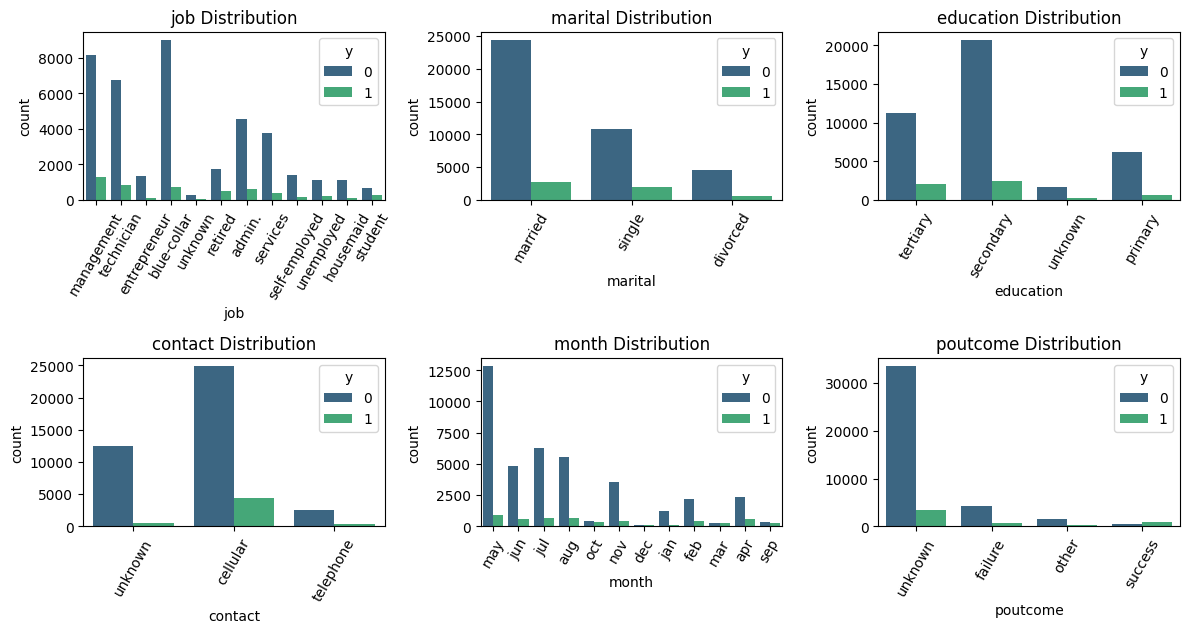

In [14]:
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
axes = axes.flatten()

for i, col_name in enumerate(cat_bank):
    sns.countplot(data=bank, x=bank[col_name], ax=axes[i], palette="viridis", hue='y')
    axes[i].set_title(f"{col_name} Distribution", fontsize=12)
    axes[i].tick_params(axis="x", rotation=60)

# Remove unused axes if cat_cols < rows*cols
for j in range(len(cat_bank), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Key observations, those who subscribe to a term deposit after the campaign:

* Management tend to subscribe to a term deposit, in comparison to other job descriptions. With technicians and blue collared people following up.
* Married people subscribe more than divorced.  
* Those with secondary and then tertiary education 
*  Cellular contact proves to be more efficient. 
* Those last contacted in May reaped best results but it also required a high count. In terms of effort and results, month of September, October, March show the most efficient results. But why is May's count so high? New policies introduced? New campaigns?  
* It is suprising how successful labelled campaigns also failed to have everyone subscribed to a term deposit. While those labelled as a failure still convinced some to subscribe. What does 'other' imply here?


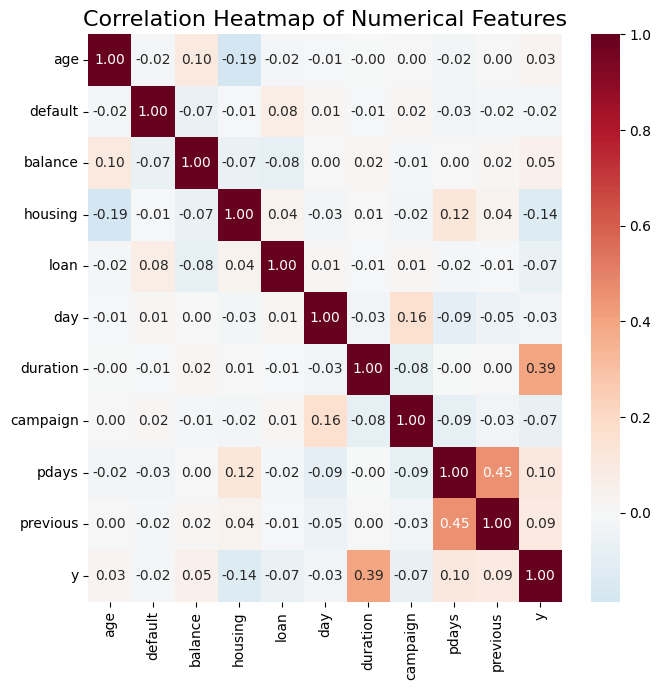

In [15]:
b_corr = bank[num_bank].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(b_corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0, cbar=True)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

We notice stronger positive correlation between pdays and previous; balance and age; and lastly, day and campaign. 

Observing the correlation with our target variable, positive (duration, pdays, previous) and negative(housing, campaign, loan).

This implies how the duration of the last contact, number of prev contacts showed us positive relations, which is proportional to the effort put in marketting. 

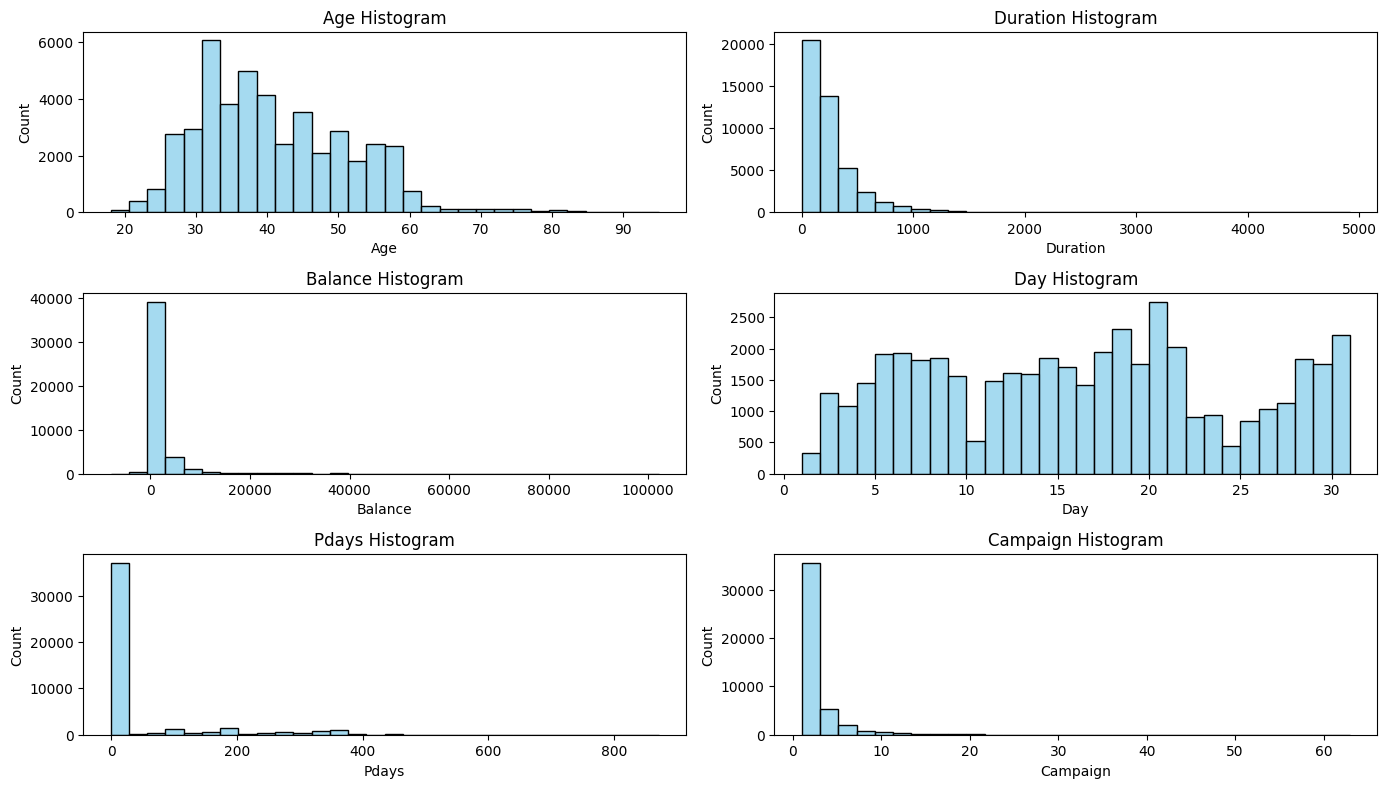

In [16]:
b_cols = ['age', 'duration', 'balance', 'day', 'pdays', 'campaign']
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for i, col in enumerate(b_cols):
    sns.histplot(bank[col], bins=30, kde=False, color="skyblue", ax=axes[i])
    axes[i].set_title(f"{col.capitalize()} Histogram", fontsize=12)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")

# Remove unused subplots if there are any
for j in range(len(b_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In our dataset, 

* 30-40 age group are highest
* Call durations are less than 500 seconds in most cases 
* People with low balance have been the target before, which is appropriate as ideally, they would need loans. 
* Campaign calls range between 0-10. 

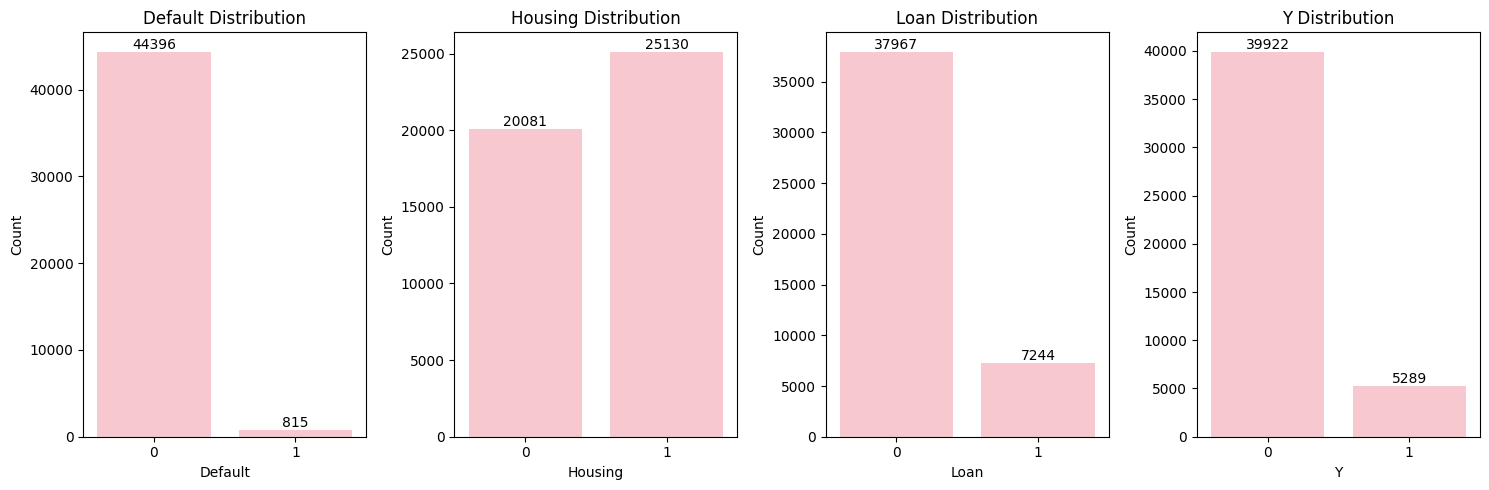

In [17]:

binary_cols = ['default', 'housing', 'loan', 'y']
fig, axes = plt.subplots(1, len(binary_cols), figsize=(15, 5))

# Plot count plots for each binary column
for i, col in enumerate(binary_cols):
    sns.countplot(x=bank[col], ax=axes[i], color="pink")
    axes[i].set_title(f"{col.capitalize()} Distribution", fontsize=12)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")

    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{int(height)}', 
                         xy=(p.get_x() + p.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()


* Most people are punctual in repaying
* Slightly more than half records have a housing loan
* while lesser people have personal loans and even lesser take up the subscription. 

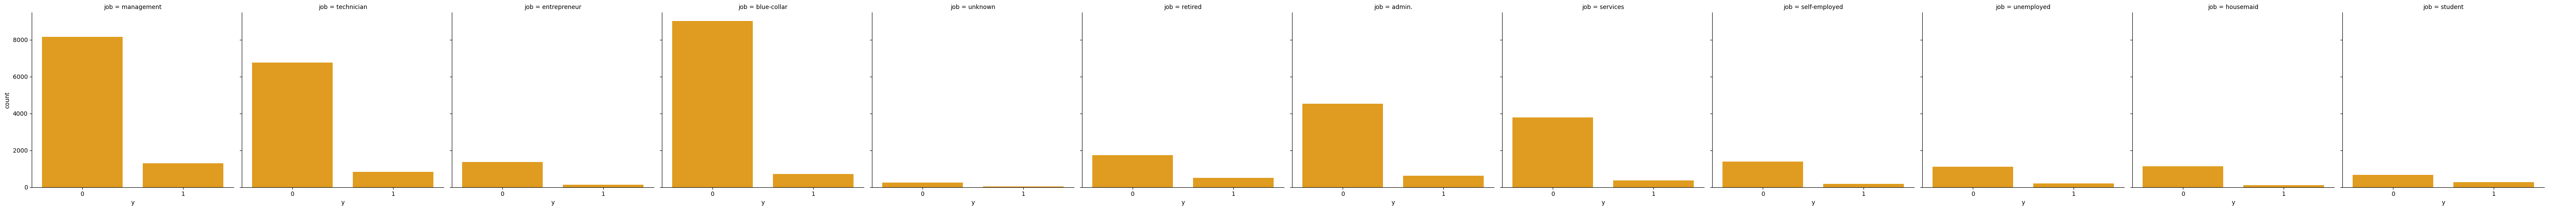

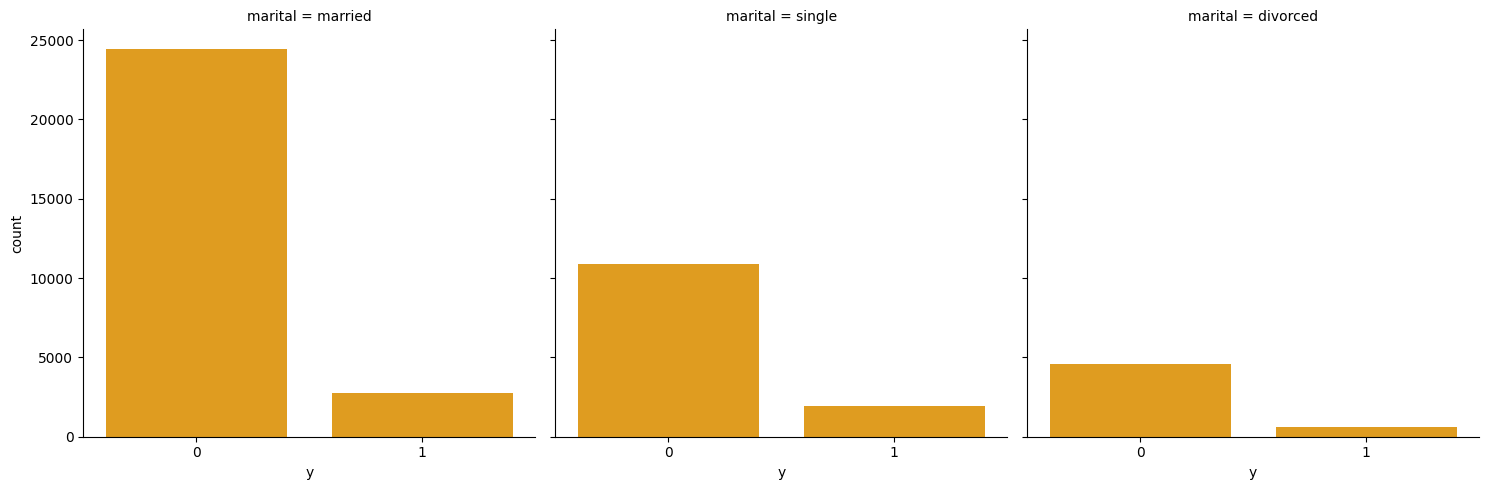

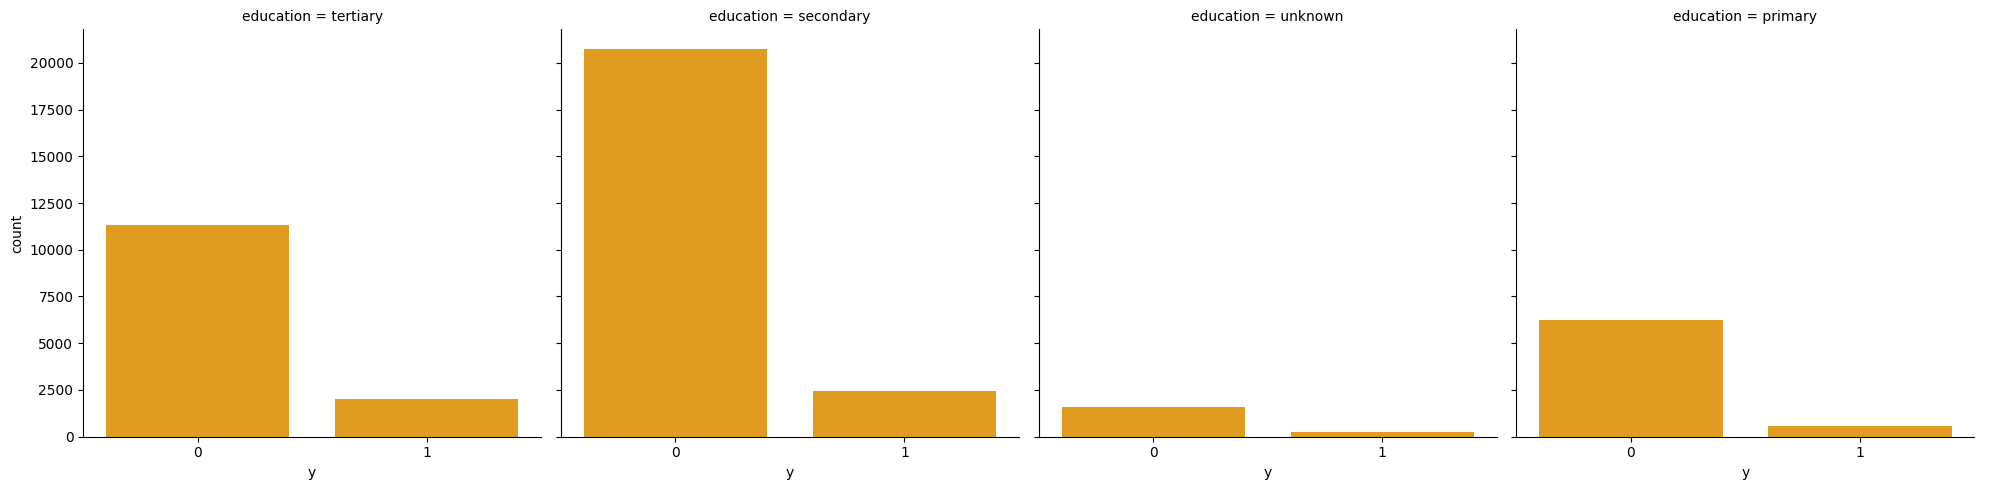

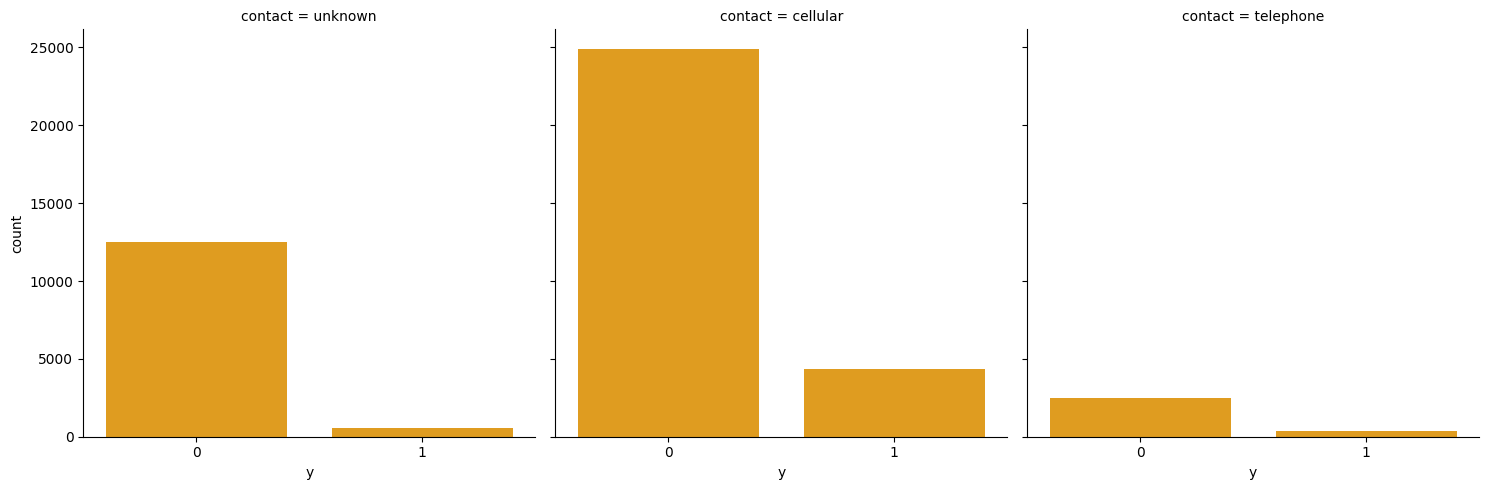

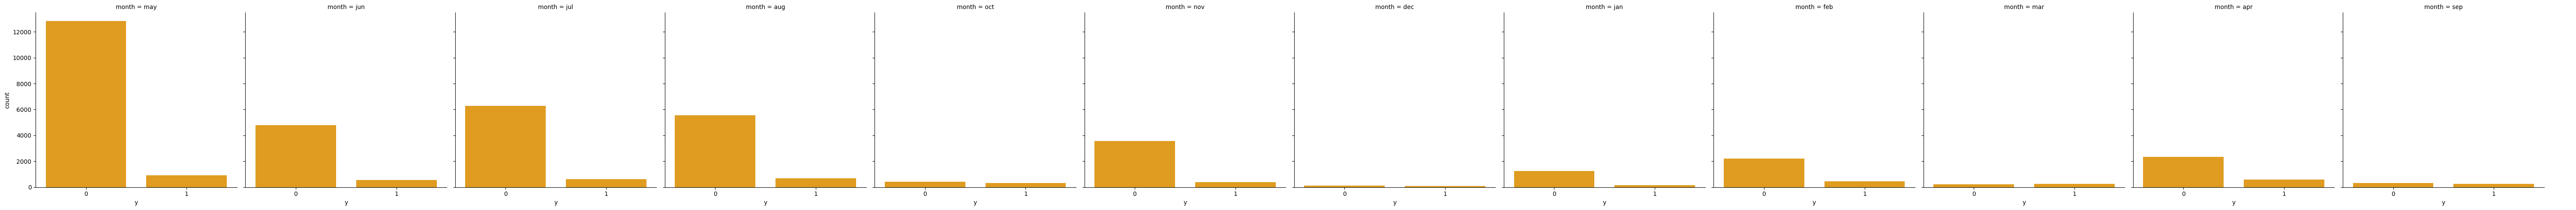

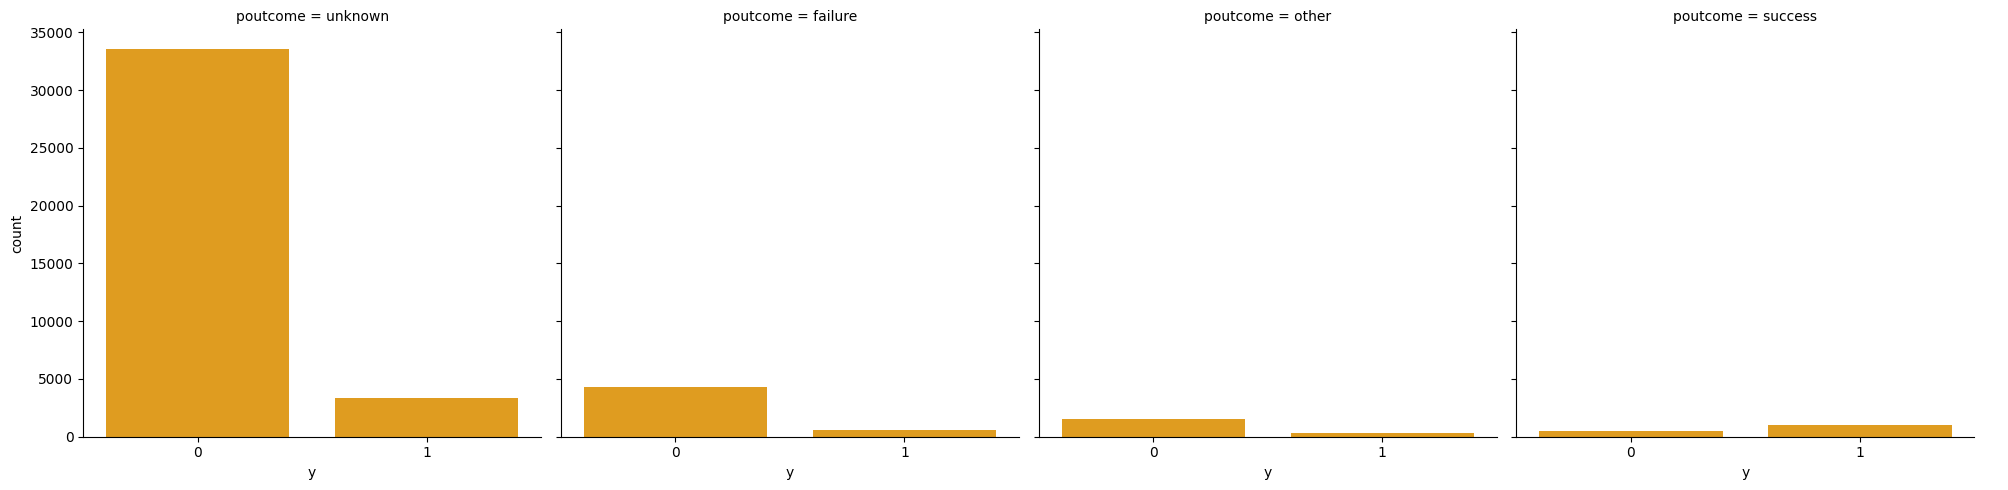

In [18]:
for cat_feature in cat_bank:
    sns.catplot(x='y', col=cat_feature, kind='count', color= "orange" , data= bank)
plt.show()

Shows overall relationship between categorical features and labels.

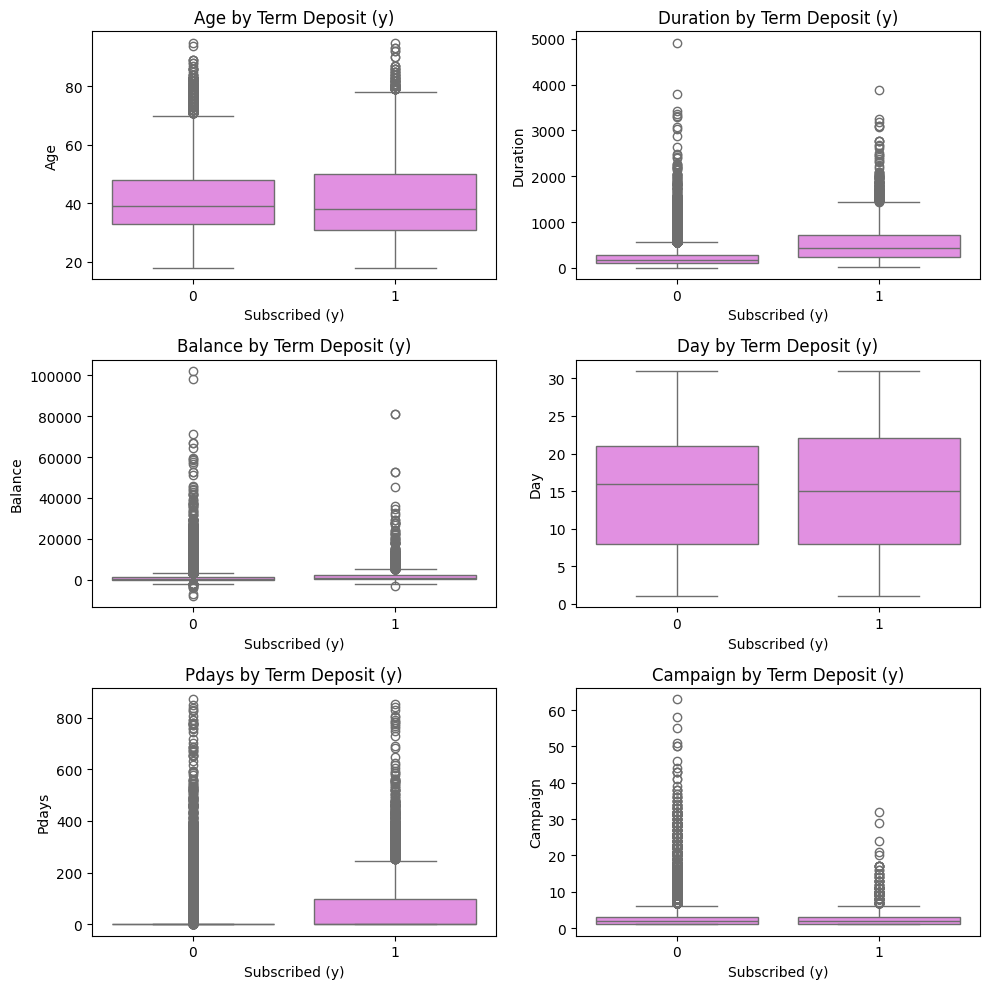

In [19]:

# List of numeric columns to plot
num1_bank = ['age', 'duration', 'balance', 'day', 'pdays', 'campaign']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(num1_bank):
    sns.boxplot(data=bank, x='y', y=col, ax=axes[i], color='violet')
    axes[i].set_title(f"{col.capitalize()} by Term Deposit (y)", fontsize=12)
    axes[i].set_xlabel("Subscribed (y)")
    axes[i].set_ylabel(col.capitalize())

# Remove unused subplots if any
for j in range(len(num1_bank), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Observations made, majorly getting an idea about the outliers, that end up taking the subscription:
* Age (80 and above)  
* Call duration longer than almost 1500 seconds
* If days of contact for the previous campaign is higher than 250 days 
* campaign contacts greater than 7 or 8 


***

## <span style="background-color:yellow;">TASK 3: Preprocessing</span>

***


Now we deal with unknown in demographic data like job, education, contact, poutcome:

In [20]:
bank.replace('unknown', np.nan, inplace=True)

# Fill categorical NaNs with mode 
cat_cols = ['job', 'marital', 'education', 'contact', 'poutcome']
for col in cat_cols:
    mode_value = bank[col].mode()[0]
    bank[col] = bank[col].fillna(mode_value)


We choose robust scaling instead of standard scaling for normal distribution as our columns are outlier heavy. 

In [21]:
from sklearn.preprocessing import RobustScaler

num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
scaler = RobustScaler()
bank[num_cols] = scaler.fit_transform(bank[num_cols])


From my list of outliers:

a) age:  natural range (17–100). Outliers above 90 may be rare but real; so we cap them.

b) duration: phone call duration, has a long right tail. Outliers are not errors but indicate long calls, so it is better to log transform.

c) pdays : number of days since last campaign contact; and we treat -1 as a special case (never contacted)

d) campaign : number of contacts during this campaign; small integers, but large outliers (dozens of calls) so we clip high values.

e) balance : average yearly balance, can have huge positive/negative values, we can winsorize or log transform.

In [22]:
# we clip outliers for age and campaign
for col in ['age', 'campaign']:
    lower, upper = bank[col].quantile([0.01, 0.99]) #99 percentile
    bank[col] = bank[col].clip(lower, upper)

bank['pdays'] = bank['pdays'].replace(-1, np.nan)
bank['pdays'] = bank['pdays'].fillna(0) 
#using mean/median would distort our clusters.

# Log transform highly skewed columns
for col in ['balance', 'duration']:
    bank[col] = np.log1p(bank[col] - bank[col].min() + 1)

bank[['age','balance','duration','pdays','campaign']].describe()


,age,balance,duration,pdays,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.125844,2.170057,1.112984,41.197828,0.345701
std,0.692284,0.170335,0.290600,100.128746,1.292870
min,-1.066667,0.693147,0.693147,0.000000,-0.500000
25%,-0.400000,2.075285,0.906988,0.000000,-0.500000
50%,0.000000,2.109498,1.041454,0.000000,0.000000
75%,0.600000,2.193530,1.246127,0.000000,0.500000
max,2.133333,4.421591,3.209573,872.000000,7.000000


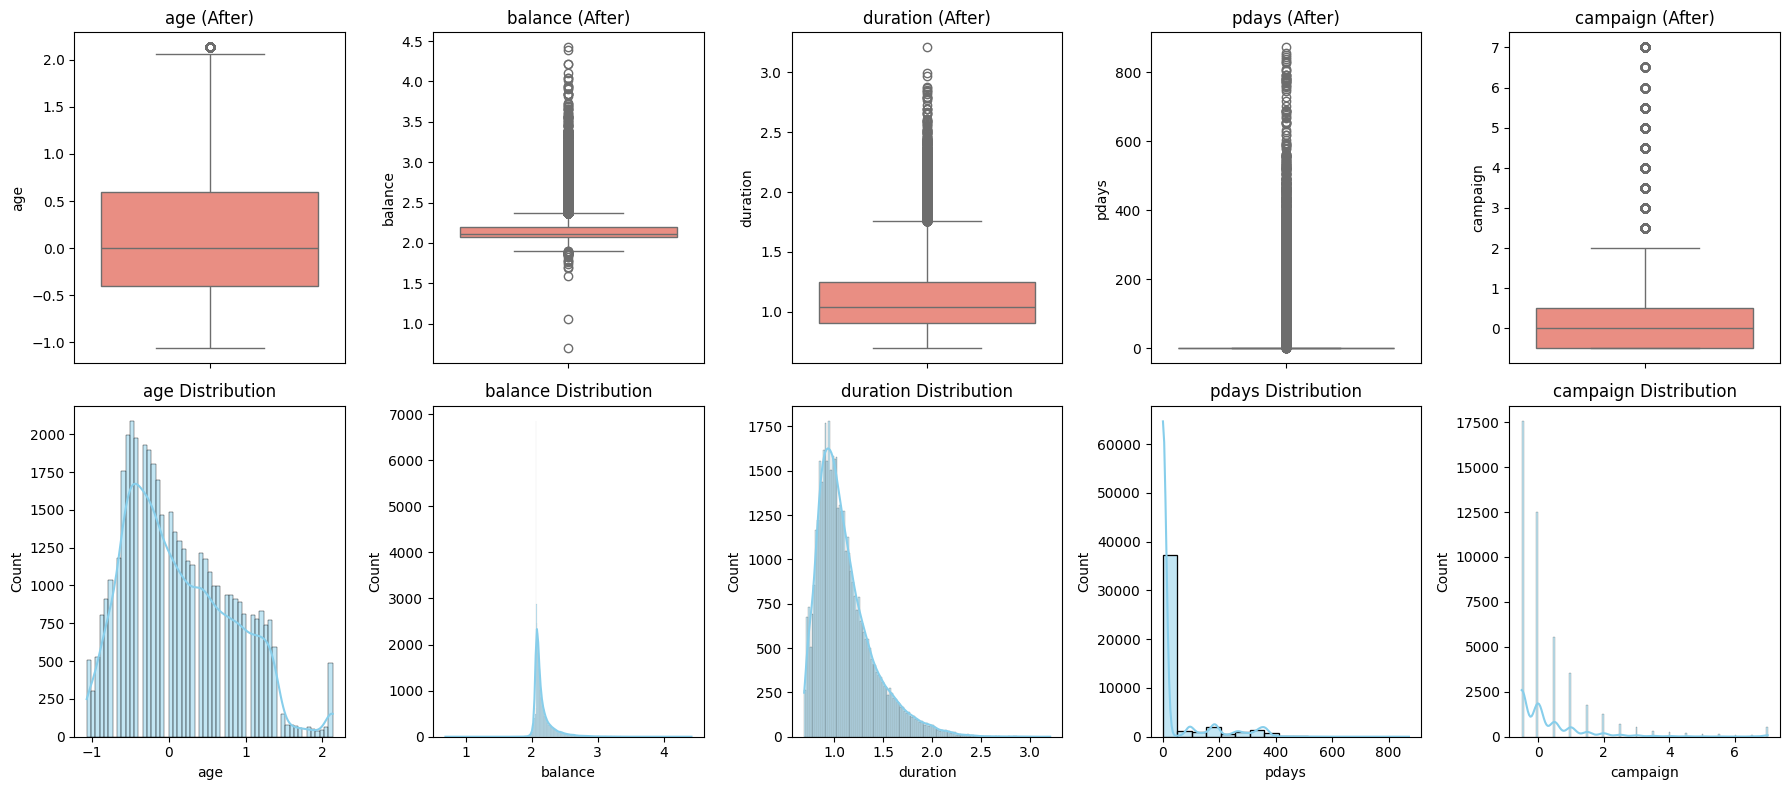

In [23]:
check_c = ['age','balance','duration','pdays','campaign']

fig, axes = plt.subplots(2, len(check_c), figsize=(18, 8))
for i, col in enumerate(check_c):
    sns.boxplot(y=bank[col], ax=axes[0, i], color='salmon')
    axes[0, i].set_title(f'{col} (After)')

    sns.histplot(bank[col], ax=axes[1, i], kde=True, color='skyblue')
    axes[1, i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


This works for clustering and eventualluy dimension reduction as:

Clipping avoids rare extremes dominating Euclidean dis.

Log transform stabilizes spread for PCA, prevents huge variance directions.

Replacing -1 in pdays makes feature more meaningful for distance-based algorithms.

In [24]:
# Binary encoding (done previously, showing for reporting purposes)
# binary_cols = ['default', 'housing', 'loan', 'y']
# for col in binary_cols:
#     bank[col] = bank[col].map({'yes': 1, 'no': 0})

# One-hot encoding
bank = pd.get_dummies(bank, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True).astype('int64')

In [25]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1,0,2,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,2,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


We encoding categorical data such that it can be processed by the algorithm. 

Now we can try out undersampling since our target variable is imbalanced. This will help in our supervised models (like PCA). How much of an impact will this have on our clustering models? 

In [26]:
!pip install imbalanced-learn --quiet



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [27]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = bank.drop('y', axis=1)  # take note, the bank dataset is before undersampling. 
y = bank['y']

print("Before undersampling:", Counter(y))


Before undersampling: Counter({0: 39922, 1: 5289})


In [28]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print("After undersampling:", Counter(y_res))

After undersampling: Counter({0: 5289, 1: 5289})


In [29]:
bank1 = pd.concat([X_res, y_res], axis=1) #new dataframe that is undersampled

In [30]:
bank1.head() 

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,y
27950,0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5345,0,0,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14918,0,0,2,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
29953,0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40742,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*** 

## <span style="background-color:yellow;">TASK 4: Clustering Methods</span>

***

We applied multiple clustering algorithms on the dataset to identify patterns among customers based on their demographic and campaign-related features. The dataset will be preprocessed and scaled before clustering.

For clustering, I choose the following: 
* K-Means (good for compact spherical clusters)
* DBSCAN (good for arbitrary-shaped clusters and detecting noise/outliers)
* Gaussian Mixture Model (GMM): good for soft clustering, where pts can belong to clusters with certain probabilities, and for elliptical cluster shapes

Hyperparameters:
* K-Means : number of clusters k (using elbow method)
* DBSCAN : eps: maximum distance between points in the same neighborhood (choose using knee/k-distance plot). min_samples: minimum number of points to form a dense cluster (commonly 5–30).
* GMM: n_components: number of Gaussian clusters, k, max_iter: iterations for convergence.

In [31]:
X = bank1.to_numpy(dtype=float)
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

Now, to define the parameters, we used the ML libraries. 

In [ ]:
!pip install kneed -q 

In [33]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import numpy as np

inertias = [KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_ for k in range(2, 11)]
k_km = KneeLocator(range(2, 11), inertias, curve="convex", direction="decreasing").knee
print(f"Best K (K-Means): {k_km}")

bics = [GaussianMixture(n_components=k, covariance_type='full', random_state=42).fit(X_scaled).bic(X_scaled) for k in range(2, 11)]
k_gmm = KneeLocator(range(2, 11), bics, curve="convex", direction="decreasing").knee
print(f"Best Components (GMM): {k_gmm}")

k = 5
neighbors = NearestNeighbors(n_neighbors=k).fit(X_scaled)
dis, _ = neighbors.kneighbors(X_scaled) #distance
dis = np.sort(dis[:, k-1])
knee_db = KneeLocator(range(len(dis)), dis, curve="convex", direction="increasing")
knee_db = dis[knee_db.knee]
print(f"Best Epsilon (DBSCAN): {knee_db:.3f}")


Best K (K-Means): None
Best Components (GMM): 5
Best Epsilon (DBSCAN): 6.810


When k=none, the function failed to provide us with a number as there are no well separated clusters. So instead, using our domain knowledge, we use k=3 to 9. Now, we can define our functions.

When used the above, KMean (k=3), GMM(k=5) and DBSCAN(eps= 6.8 and min_sample= 80 according to its formula):

| Reduction | Algorithm | Silhouette | DB Index  |
|------------|------------|-------------|-----------|
| Original   | KMeans     | -0.066560  | 16.308814 |
| Original   | DBSCAN     | -0.850406  | 31.276582 |
| Original   | GMM        |  0.809542  |  0.554633 |
| PCA        | KMeans     |  0.129106  |  1.116013 |
| PCA        | DBSCAN     | -0.556653  | 18.635140 |
| PCA        | GMM        |  0.000000  |  0.000000 |
| LDA        | KMeans     |  0.599996  |  0.490990 |
| LDA        | DBSCAN     |  0.000000  |  0.000000 |
| LDA        | GMM        |  0.415297  |  0.525538 |


were the results. which overall suggests poor clustering. So, let's try for a different k in kmeans, eps, min_samples in DBSCAN. GMM seem to work fine. 

Let us try k= 2 for KMeans, eps=0.2 and min_samples as 40, with GMM unchanged.

In [34]:
def kmeans(X, k=2, max_iter=100):
    n = X.shape[0]
    centers = X[np.random.choice(n, k, replace=False)]
    for _ in range(max_iter):
        # Assign to nearest center
        dists = np.sqrt(((X[:, None] - centers[None, :])**2).sum(axis=2))
        labels = np.argmin(dists, axis=1)
        # Update centers
        new_centers = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.allclose(new_centers, centers):
            break
        centers = new_centers
    return labels, centers

# Cluster preprocessed data
labels_km, centers_km = kmeans(X_scaled, k=2)

Unlike KMeans, we will not be able to provide cluster centers in DBSCAN as they are density-based algorithm and they consist of core, border and noise pts instead. 

In [35]:
def pairwise_distance(X):
    n = X.shape[0]
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(i,n):
            d = np.linalg.norm(X[i]-X[j])
            D[i,j] = D[j,i] = d
    return D

def dbscan(X, eps=0.2, min_samples=40): 
    n = X.shape[0]
    labels = np.full(n, -1)
    D = pairwise_distance(X)
    cluster_id = 0
    for i in range(n):
        if labels[i] != -1:  
            continue
        neighbors = np.where(D[i] <= eps)[0]
        if len(neighbors) < min_samples:
            continue
        labels[i] = cluster_id
        seeds = list(neighbors)
        for s in seeds:
            if labels[s] == -1:
                labels[s] = cluster_id
        cluster_id += 1
    return labels

labels_db = dbscan(X_scaled, eps=0.2, min_samples=40)


We create a center for DBSCAN using mean.

In [36]:
unique_l = np.unique(labels_db[labels_db != -1])  # exclude noise
c_ctr = []

for label in unique_l:
    pts = X_scaled[labels_db == label]
    center = np.mean(pts, axis=0) 
    c_ctr.append(center)

c_ctr = np.array(c_ctr)

I will choose to plot duration and pdays columns as they have strong correlation with the target variables (0.39 and 0.10 respectively).

Rationale: While they are moderately correlated, they represent different aspects of the client journey (instantaneous engagement vs. long-term history).

In [37]:
# KMeans cluster sizes
unique_km, counts_km = np.unique(labels_km, return_counts=True)
km_sizes = dict(zip(unique_km, counts_km))

# DBSCAN cluster sizes (excluding noise)
unique_db, counts_db = np.unique(labels_db[labels_db != -1], return_counts=True)
db_sizes = dict(zip(unique_db, counts_db))


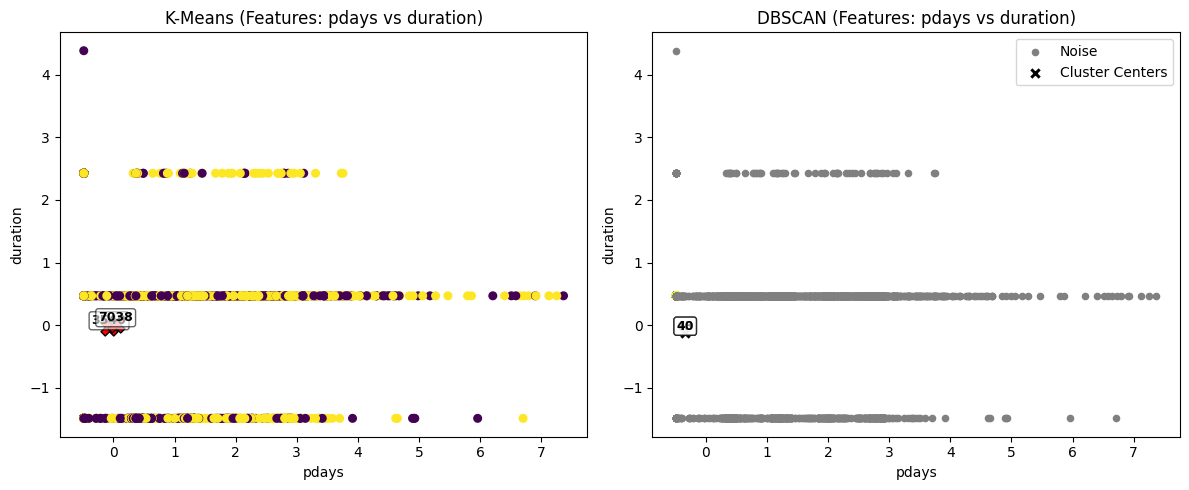

In [38]:
from sklearn.preprocessing import StandardScaler

f1 = 'pdays' # can change variables 
f2 = 'duration'
X_2d = bank1[[f1, f2]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)

plt.figure(figsize=(12, 5))

# KMeans 
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_km, cmap='viridis', s=30)
plt.scatter(centers_km[:, 0], centers_km[:, 1], c='red', marker='X', s=150, edgecolors='black', label='Centers')
for i, center in enumerate(centers_km):
    size = km_sizes.get(i, 0)
    plt.text(center[0], center[1], f"{size}", fontsize=9, color='black', ha='center', va='bottom', fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.2'))


plt.title(f"K-Means (Features: {f1} vs {f2})")
plt.xlabel(f1)
plt.ylabel(f2)

# DBSCAN 
plt.subplot(1, 2, 2)

colors_db = np.array(labels_db, dtype=float)
is_noise = colors_db == -1 #noise (label = -1)
plt.scatter(X_scaled[~is_noise, 0], X_scaled[~is_noise, 1], c=colors_db[~is_noise], cmap='plasma', s=30)
plt.scatter(X_scaled[is_noise, 0], X_scaled[is_noise, 1], c='grey', s=20, label='Noise')

show_centers = True  # can set to False if it clutters the chart
if show_centers and len(c_ctr) > 0:
    
    plt.scatter(c_ctr[:, 0], c_ctr[:, 1], c='black', s=80, marker='X', edgecolor='white',label='Cluster Centers')
    # Annotate each DBSCAN cluster center with its size
    for i, center in enumerate(c_ctr):
        size = db_sizes.get(unique_db[i], 0)
        plt.text(center[0], center[1], f"{size}", fontsize=9, color='black',ha='center', va='bottom', fontweight='bold',
                 bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.2'))

plt.title(f"DBSCAN (Features: {f1} vs {f2})")
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend()

plt.tight_layout()
plt.show()

Each color shows that they are a different cluster, with its sizes. The noise is shown as gray datapts. 

This causes our model to miss essential information as clusters can only take 2 features at a time. 

We added GMM, that does soft clustering as a result of several normal distributions. Since our data visuals seem to be overlapping, instead of being spherical (the chosen features are to be held responsible as they are discrete values). 

In [39]:
def gaussian_pdf(X, mean, cov):
    X = np.atleast_2d(X)
    mean = np.atleast_1d(mean)
    cov = np.atleast_2d(cov)
    n = X.shape[1]

    # Handle 1D case: covariance may be scalar
    if cov.shape == (1, 1):
        cov_det = cov[0, 0]
        cov_inv = 1.0 / cov[0, 0]
        norm_const = 1.0 / np.sqrt(2 * np.pi * cov_det)
        diff = X - mean
        exponent = -0.5 * (diff ** 2) * cov_inv
        return norm_const * np.exp(exponent).ravel()
    else:
        # Multivariate case
        cov_det = np.linalg.det(cov)
        cov_inv = np.linalg.inv(cov)
        norm_const = 1.0 / np.sqrt((2 * np.pi)**n * cov_det)
        diff = X - mean
        exponent = -0.5 * np.sum(diff @ cov_inv * diff, axis=1)
        return norm_const * np.exp(exponent)



def gmm(X, k=5, max_iter=100, tol=1e-4):
    n, d = X.shape
    # Random initialization
    np.random.seed(42)
    means = X[np.random.choice(n, k, replace=False)]
    covs = np.array([np.cov(X.T) for _ in range(k)])
    weights = np.ones(k) / k
    prev_log_likelihood = 0

    for _ in range(max_iter):
        # E step
        responsibilities = np.zeros((n, k))
        for i in range(k):
            responsibilities[:, i] = weights[i] * gaussian_pdf(X, means[i], covs[i])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        # M step
        Nk = responsibilities.sum(axis=0)
        weights = Nk / n
        means = (responsibilities.T @ X) / Nk[:, None]
        covs = np.array([
            ((responsibilities[:, i][:, None] * (X - means[i])).T @ (X - means[i])) / Nk[i]
            for i in range(k)
        ])

        # Check convergence
        log_likelihood = np.sum(np.log(np.sum(responsibilities, axis=1)))
        if abs(log_likelihood - prev_log_likelihood) < tol:
            break
        prev_log_likelihood = log_likelihood

    labels = np.argmax(responsibilities, axis=1)
    return labels, means, covs

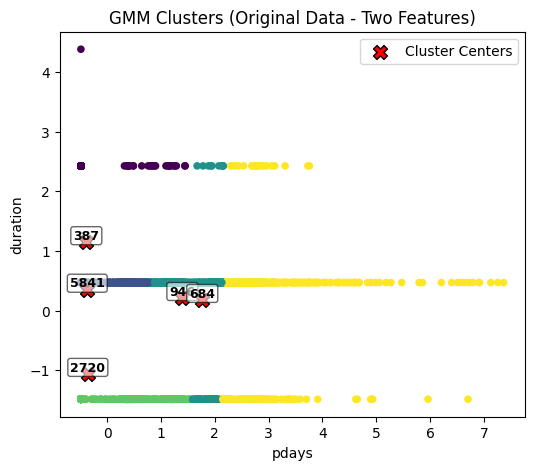

In [40]:
labels_gmm, means_gmm, covs_gmm = gmm(X_scaled, k=5)

# Compute cluster sizes
unique_gmm, counts_gmm = np.unique(labels_gmm, return_counts=True)
gmm_sizes = dict(zip(unique_gmm, counts_gmm))

# Plot using 2 features (since original data has 17D)
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_gmm, cmap='viridis', s=20)
plt.title("GMM Clusters (Original Data - Two Features)")
plt.scatter(means_gmm[:, 0], means_gmm[:, 1], c='red', marker='X', s=100, edgecolors='black', label='Cluster Centers')
# Annotate each GMM center with its cluster size
for i, mean in enumerate(means_gmm):
    size = gmm_sizes.get(i, 0)
    plt.text(mean[0], mean[1], f"{size}", fontsize=9, color='black', ha='center', va='bottom', fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.2'))

plt.legend()
plt.xlabel(f1)
plt.ylabel(f2)
plt.show()

The x-axis pdays measures the number of days since the client was last contacted. The y-axis durationis the call duration.
The clusters are mostly separated vertically, suggesting that call duration plays a stronger role in defining cluster membership than pdays.
A few clusters overlap slightly along the horizontal axis, meaning clients with similar pdays values can belong to different clusters depending on their duration.

Visualizations above show how dimension reduction is needed such that the important features can be derived and actual visualisations can be more apt for the dataset to deliver relevant information. 

In [41]:
def sil_score(X, labels):
    D = pairwise_distance(X)
    sil = np.zeros(len(X))
    unique_labels = set(labels)

    if len(unique_labels) < 2:
        # Silhouette is undefined for single cluster
        return 0  

    for i in range(len(X)):
        same = labels == labels[i]
        a = np.mean(D[i, same]) if np.sum(same) > 1 else 0
        b_values = [np.mean(D[i, labels == c]) for c in unique_labels if c != labels[i]]
        b = np.min(b_values) if len(b_values) > 0 else 0
        sil[i] = (b - a) / max(a, b) if max(a, b) > 0 else 0

    return np.mean(sil)

In [42]:
def DB_index(X, labels):
    clusters = np.unique(labels)
    k = len(clusters)
    centroids = np.array([X[labels == c].mean(axis=0) for c in clusters])
    S = np.array([np.mean(np.linalg.norm(X[labels == c] - centroids[i], axis=1)) for i, c in enumerate(clusters)])
    M = np.linalg.norm(centroids[:, None] - centroids[None, :], axis=2)
    R = (S[:, None] + S[None, :]) / (M + 1e-10)
    np.fill_diagonal(R, 0)
    return np.mean(np.max(R, axis=1))

In [43]:
# # K-Means
# labels_km, centers_km = kmeans(X_scaled, k=2)
sil_km = sil_score(X_scaled, labels_km)
dbi_km = DB_index(X_scaled, labels_km)

In [44]:
# DBSCAN
# labels_db = dbscan(X_scaled, eps= 0.2, min_samples=40)
sil_db = sil_score(X_scaled, labels_db)
dbi_db = DB_index(X_scaled, labels_db)

In [ ]:
# GMM
# labels_gmm, means_gmm, covs_gmm = gmm(X_scaled, k=5)
sil_gmm = sil_score(X_scaled, labels_gmm)
dbi_gmm = DB_index(X_scaled, labels_gmm)

In [46]:
print("Original Data:")
print(f"KMeans   = Silhouette: {sil_km:.4f}, DB Index: {dbi_km:.4f}")
print(f"DBSCAN   = Silhouette: {sil_db:.4f}, DB Index: {dbi_db:.4f}")
print(f"GMM      = Silhouette: {sil_gmm:.4f}, DB Index: {dbi_gmm:.4f}")

Original Data:
KMeans   = Silhouette: 0.0009, DB Index: 96.1848
DBSCAN   = Silhouette: -0.4778, DB Index: 1.7674
GMM      = Silhouette: 0.8095, DB Index: 0.5546


We aim for high silhouette score (closer to 1) and low db index (closer to 0), to choose the best clustering method for our dataset. 

### KMeans
Pros:
- Simple, fast, and efficient for large datasets.  
- Works well when clusters are spherical and of similar size.  

Cons:
- Requires specifying the number of clusters 
- Performs poorly on overlapping or irregularly shaped clusters.  
- Very high DB Index (96.18) and near-zero Silhouette (0.0009) indicate weak separation.  

Use Case:
- Suitable for clean, well-separated numeric data such as customer segmentation with clear group boundaries.  


### DBSCAN
Pros:
- Does not require specifying the number of clusters.  
- Can detect clusters of arbitrary shape and identify noise/outliers.  

Cons:
- Highly sensitive to eps and min_samples parameters.  
- May merge clusters or mark many points as noise if parameters are not tuned correctly.  
- Negative Silhouette (-0.4778) shows poor cluster structure for this dataset.  

Use Case:
- Best for datasets with varying densities or when noise and outliers are expected.  


### Gaussian Mixture Model (GMM)
Pros:
- Allows flexible, elliptical cluster shapes and soft (probabilistic) assignments.  
- Performs well when clusters overlap.  
- High Silhouette (0.8095) and low DB Index (0.55) indicate strong, well-separated clusters.  

Cons:
- More computationally intensive than KMeans.  
- Can overfit if too many components are used.  

Use Case:
- Ideal for complex datasets where clusters are not clearly separated or have overlapping boundaries — as seen in the Bank Marketing data.  

*** 

## <span style="background-color:yellow;">TASK 5: Dimensionality Reduction</span>

***

Intention with dimension reduction: Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) to reduce the data dimensions to a maximum of 2 for visualization.

***PCA*** : Unsupervised: PCA does not use the class label (Y). It icaptures the maximum overall variance and preserve the intrinsic structure of the full dataset, regardless of the target variable.

Visualisation: This shows how the original data naturally clusters, based purely on feature variance.

***LDA***: Supervised: LDA uses the class label (Y). It finds the dimensions that maximize the separation between the classes, making it ideal for classification tasks. 

Visualisation: This visualization directly shows the extent to which the reduced feature successfully separates the classes, which is its primary purpose.

By the end of the notebook, we will realise how LDA is prefered over PCA in this case. Our dataset is an example of binary classification with two classes (yes/no) and this makes it more suitable for LDA over PCA. 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

PCA for dimension reduction:

In [48]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1,0,2,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,2,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
X = bank1.drop(columns=['y'])
y = bank1['y'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # PCA-reduced data
X_pca= X_2d

labels_km, centers_2d = kmeans(X_pca, k=2)
labels_db = dbscan(X_pca, eps=0.2, min_samples=40)
labels_gmm, means_gmm, covs_gmm = gmm(X_pca, k=5)

For experiment purposes, also trying LDA: 

In [50]:
lda = LDA(n_components=1) # y is binary, components= class-1 = 2-1 =1 
X_lda = lda.fit_transform(X_scaled, y)

*** 

## <span style="background-color:yellow;">TASK 6: Clustering After Dimensionality Reduction</span>

***

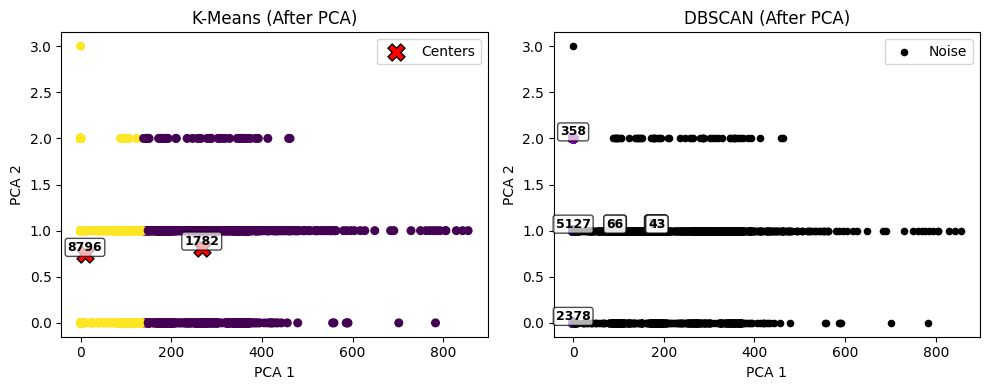

In [51]:
plt.figure(figsize=(10, 4))

# Kmeans 
plt.subplot(1, 2, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_km, cmap='viridis', s=30)
plt.scatter( centers_2d[:, 0], centers_2d[:, 1], c='red', marker='X', s=150, edgecolors='black', label='Centers')
unique_km, counts_km = np.unique(labels_km, return_counts=True)
for i, center in enumerate(centers_2d):
    size = counts_km[i]
    plt.text(center[0], center[1], f"{size}", fontsize=9, color='black', ha='center', va='bottom', fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))

plt.title("K-Means (After PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()


plt.subplot(1, 2, 2)
colors_db = np.array(labels_db, dtype=float)
is_noise = colors_db == -1
plt.scatter(X_2d[~is_noise, 0], X_2d[~is_noise, 1], c=colors_db[~is_noise], cmap='plasma', s=40)
plt.scatter(X_2d[is_noise, 0], X_2d[is_noise, 1], c='black', s=20, label='Noise')

# Annotate DBSCAN cluster sizes 
unique_db, counts_db = np.unique(labels_db[labels_db != -1], return_counts=True)
for j, label in enumerate(unique_db):
    pts = X_2d[labels_db == label]
    cx, cy = pts.mean(axis=0)
    plt.text(cx, cy, f"{counts_db[j]}", fontsize=9, color='black', ha='center', va='bottom',
             fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))

# if len(c_ctr) > 0: but commented because it is cluttered
#     plt.scatter(c_ctr[:, 0], c_ctr[:, 1], c='white', s=80, marker='X', edgecolor='black', label='Cluster Centers')
plt.title("DBSCAN (After PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()

plt.tight_layout()
plt.show()

After applying PCA for dimensionality reduction, the clustering visualization shows clear differences in performance between K-Means and DBSCAN.  
- **K-Means** forms three distinct clusters with visible separation and well-defined centers, though some overlap still exists along the PCA1 axis. This indicates that PCA helped simplify the structure, but the data may still not be spherical.  
- **DBSCAN**, on the other hand, identifies a few small clusters and a large number of noise points (black dots). This suggests that the dataset does not have strong density-based cluster patterns. 

Overall, K-Means provides more stable and interpretable clustering after PCA, while DBSCAN detects too many noise points, making it less effective for this reduced feature space.


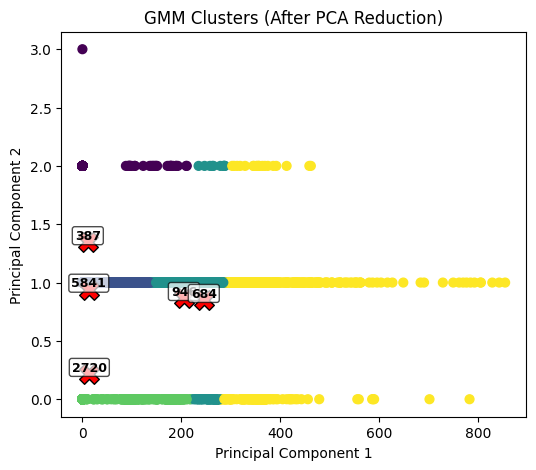

In [52]:
# Plot
plt.figure(figsize=(6, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_gmm, cmap='viridis', s=40)
plt.scatter(means_gmm[:, 0], means_gmm[:, 1], c='red', marker='X', s=200, edgecolors='black', label='Cluster Centers')
unique_gmm, counts_gmm = np.unique(labels_gmm, return_counts=True)
count_dict = dict(zip(unique_gmm, counts_gmm))

for i, mean in enumerate(means_gmm):
    size = count_dict.get(i, 0)  # get 0 if cluster empty
    plt.text(mean[0], mean[1], f"{size}", fontsize=9, color='black', ha='center', va='bottom',
             fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))


plt.title("GMM Clusters (After PCA Reduction)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


The GMM plot after PCA reduction shows three main clusters with moderate overlap. The largest cluster (≈5841 points) dominates, while smaller ones (e.g., 684, 387) capture minority patterns. PCA helped reveal clear structure along the first component, though some mixing remains, showing partial but meaningful separation in reduced dimensions.

In [53]:
sil_km_pca = sil_score(X_pca, labels_km)
dbi_km_pca = DB_index(X_pca, labels_km)

In [54]:
sil_db_pca = sil_score(X_pca, labels_db)
dbi_db_pca = DB_index(X_pca, labels_db)

In [55]:
sil_gmm_pca = sil_score(X_pca, labels_gmm)
dbi_gmm_pca = DB_index(X_pca, labels_gmm)

print("\n After PCA Reduction")
print(f"KMeans  = Silhouette: {sil_km_pca:.4f}, DB Index: {dbi_km_pca:.4f}")
print(f"DBSCAN  = Silhouette: {sil_db_pca:.4f}, DB Index: {dbi_db_pca:.4f}")
print(f"GMM     = Silhouette: {sil_gmm_pca:.4f}, DB Index: {dbi_gmm_pca:.4f}")


 After PCA Reduction
KMeans  = Silhouette: 0.8533, DB Index: 0.3948
DBSCAN  = Silhouette: 0.6618, DB Index: 1.9055
GMM     = Silhouette: 0.0514, DB Index: 16.0036


Now, we find results with LDA, and to the compare our results. 

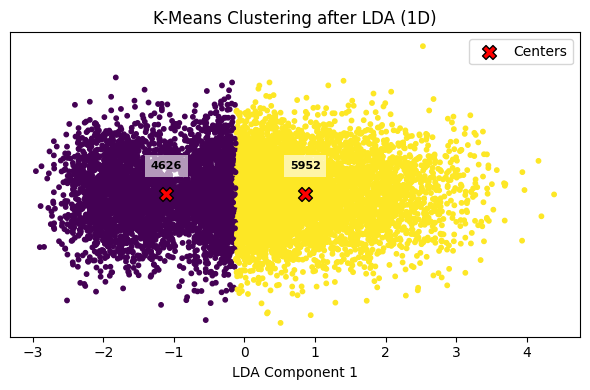

In [56]:
# Add jitter for visibility (since LDA is 1D)
y_jitter = np.random.normal(0, 0.02, size=X_lda.shape[0])

labels_km, centers_km = kmeans(X_lda, k=2)

plt.figure(figsize=(6, 4))
plt.scatter(X_lda[:, 0], y_jitter, c=labels_km, cmap='viridis', s=10)
plt.scatter(centers_km[:, 0], np.zeros_like(centers_km[:, 0]),c='red', marker='X', s=100, edgecolors='black', label='Centers')

# annotate sizes
unique_km, counts_km = np.unique(labels_km, return_counts=True)
for i, c in enumerate(centers_km):
    plt.text(c[0], 0.015, f"{counts_km[i]}", ha='center', fontsize=8, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.title("K-Means Clustering after LDA (1D)")
plt.xlabel("LDA Component 1")
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

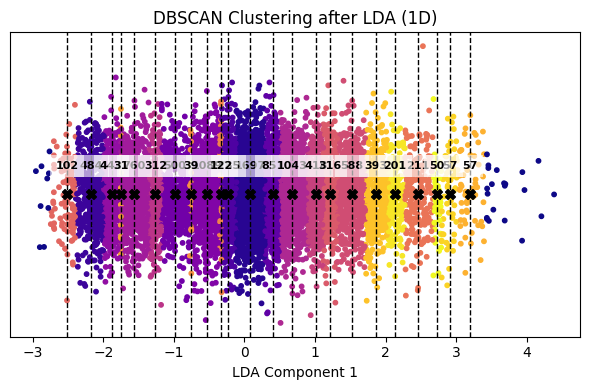

In [57]:
labels_db = dbscan(X_lda, eps=0.2, min_samples=40)

# Compute cluster centers (excluding noise)
unique_l = np.unique(labels_db[labels_db != -1])
c_ctr = []
for label in unique_l:
    pts = X_lda[labels_db == label]
    center = np.mean(pts, axis=0)
    c_ctr.append(center)
c_ctr = np.array(c_ctr)

plt.figure(figsize=(6, 4))
plt.scatter(X_lda[:, 0], y_jitter, c=labels_db, cmap='plasma', s=10)

# annotate sizes
unique_db, counts_db = np.unique(labels_db[labels_db != -1], return_counts=True)
for label, center in zip(unique_db, c_ctr):
    count = counts_db[label]
    plt.text(center[0], 0.015, f"{count}", ha='center', fontsize=8, fontweight='bold',bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

for c in c_ctr:
    plt.axvline(x=c[0], color='black', linestyle='--', linewidth=1)
    plt.scatter(c[0], 0, color='black', s=50, marker='X')

plt.title("DBSCAN Clustering after LDA (1D)")
plt.xlabel("LDA Component 1")
plt.yticks([])
plt.tight_layout()
plt.show()

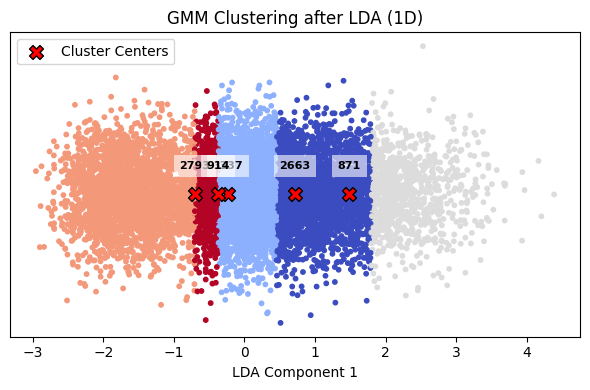

In [58]:
X_lda = X_lda.reshape(-1, 1)
labels_gmm, means_gmm, covs_gmm = gmm(X_lda, k=5)


plt.figure(figsize=(6, 4))
plt.scatter(X_lda[:, 0], y_jitter, c=labels_gmm, cmap='coolwarm', s=10)
plt.scatter(means_gmm[:, 0], np.zeros_like(means_gmm[:, 0]), c='red', edgecolors='black', marker='X', s=100, label='Cluster Centers')

# annotate sizes
unique_gmm, counts_gmm = np.unique(labels_gmm, return_counts=True)
for label, mean in zip(unique_gmm, means_gmm):
    count = counts_gmm[label]
    plt.text(mean[0], 0.015, f"{count}", ha='center', fontsize=8, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.title("GMM Clustering after LDA (1D)")
plt.xlabel("LDA Component 1")
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
sil_km_lda = sil_score(X_lda, labels_km)
dbi_km_lda = DB_index(X_lda, labels_km)

In [60]:
sil_db_lda = sil_score(X_lda, labels_db)
dbi_db_lda = DB_index(X_lda, labels_db)

In [61]:
sil_gmm_lda = sil_score(X_lda, labels_gmm)
dbi_gmm_lda = DB_index(X_lda, labels_gmm)

print("\n After LDA Reduction ")
print(f"KMeans  = Silhouette: {sil_km_lda:.4f}, DB Index: {dbi_km_lda:.4f}")
print(f"DBSCAN  = Silhouette: {sil_db_lda:.4f}, DB Index: {dbi_db_lda:.4f}")
print(f"GMM     = Silhouette: {sil_gmm_lda:.4f}, DB Index: {dbi_gmm_lda:.4f}")



 After LDA Reduction 
KMeans  = Silhouette: 0.5299, DB Index: 0.6495
DBSCAN  = Silhouette: 0.3214, DB Index: 4.1842
GMM     = Silhouette: 0.4153, DB Index: 0.5255


In [62]:
table = pd.DataFrame([
    ['Original', 'KMeans', sil_km, dbi_km],
    ['Original', 'DBSCAN', sil_db, dbi_db],
    ['Original', 'GMM', sil_gmm, dbi_gmm],
    ['PCA', 'KMeans', sil_km_pca, dbi_km_pca],
    ['PCA', 'DBSCAN', sil_db_pca, dbi_db_pca],
    ['PCA', 'GMM', sil_gmm_pca, dbi_gmm_pca],
    ['LDA', 'KMeans', sil_km_lda, dbi_km_lda],
    ['LDA', 'DBSCAN', sil_db_lda, dbi_db_lda],
    ['LDA', 'GMM', sil_gmm_lda, dbi_gmm_lda],
], columns=['Reduction', 'Algorithm', 'Silhouette', 'DB Index'])

print("\nFinal Comparison Table:")
print(table)


Final Comparison Table:
  Reduction Algorithm  Silhouette   DB Index
0  Original    KMeans    0.000936  96.184787
1  Original    DBSCAN   -0.477759   1.767431
2  Original       GMM    0.809542   0.554633
3       PCA    KMeans    0.853259   0.394759
4       PCA    DBSCAN    0.661793   1.905531
5       PCA       GMM    0.051440  16.003580
6       LDA    KMeans    0.529861   0.649524
7       LDA    DBSCAN    0.321422   4.184205
8       LDA       GMM    0.415297   0.525538


## Comparing results: 

### Before reduction (Original space):

Clusters are formed based on 2 key features (2 out of 38 features in the bank dataset chosen by correlation).

The model is observed to have vertical streaks of clusters, differently colored because of different algorithms. 
Hence it has the ability to provide a richer structure where subtle feature relationships that can’t be visualized directly.
Quantitatively, the clusters are more compact and slightly overlapping. 

Metrics: 

| Reduction | Algorithm | Silhouette | DB Index  |
|------------|------------|-------------|-----------|
| Original   | KMeans     |  0.000936   | 96.184787 |
| Original   | DBSCAN     | -0.477759   | 1.767431  |
| Original   | GMM        | 0.809542    | 0.554633  |


Here, only GMM performed satisfatorily, with sil_score close to 1 and DB_index close to 0 in comparison to other clusters. 

### After PCA reduction:

PCA compresses information into just two components explaining most variance, not necessarily the variance between clusters.
Visualizations show vertical overlapping or blended clusters because fine distinctions in higher dimensions get flattened.
However, PCA helps reveal broad groupings or trends that are otherwise invisible.

| Reduction | Algorithm | Silhouette | DB Index  |
|------------|------------|-------------|-----------|
| PCA        | KMeans     | 0.853259    | 0.394759  |
| PCA        | DBSCAN     | 0.661793    | 1.905531  |
| PCA        | GMM        | 0.051440    | 16.003580 |

Here, KMeans had a better performance. 

### After LDA reduction:

LDA is supervised, the clusters appeared more compact with soft boundaries since LDA maximizes inter-class separation.
Thus, LDA plot looked more “meaningful” visually than PCA.

| Reduction | Algorithm | Silhouette | DB Index  |
|------------|------------|-------------|-----------|
| LDA        | KMeans     | 0.529861    | 0.649524  |
| LDA        | DBSCAN     | 0.321422    | 4.184205  |
| LDA        | GMM        | 0.415297    | 0.525538  |


Both, KMeans and GMM had comparable performance in this reduction algorithm. Hence LDA is the preferred dimension reduction model here. 

### Observations

GMM generally outperformed K-Means and DBSCAN across all settings, indicating that the Bank dataset clusters were not purely spherical (which K-Means assumes) but elliptical—something GMM models better.

PCA improved cluster separation moderately, suggesting that dimensionality reduction helped remove noise.

LDA provided the most meaningful clustering results, likely because it leveraged class information (supervised reduction), leading to higher separation between classes.

DBSCAN struggled with high-dimensional data and density imbalance, creating too many small clusters or labeling many points as noise.

The Silhouette Score and DBI trends indicate that the LDA-based representation best captured structure in the Bank dataset.

*** 

## <span style="background-color:yellow;">TASK 7: Comparison and Discussion</span>

***

### Cluster Shapes and Interpretability
K-Means tends to form equal-sized circular clusters, which doesn’t suit the Bank dataset’s complex structure.

GMM’s probabilistic framework adapts to varying cluster densities, hence higher stability and interpretability.

DBSCAN worked well only for very dense regions, indicating that the data’s density variation was high.

### Impact of Dimensionality Reduction
PCA helped visualize the data and slightly improved performance by removing redundant correlations.

LDA gave a larger improvement, as it directly maximized class separability. This proves that supervised reduction techniques can enhance unsupervised learning when labels are available for preprocessing. This exercise suggested that LDA-reduced clusters correspond more closely to actual bank decision outcomes (like “subscribe” or “not subscribe” in marketing).

### Trade-offs and Insights

K-Means: Fast, but oversimplifies structure.

GMM: More flexible, slightly higher computational cost.

DBSCAN: Parameter-sensitive (eps and min_samples), struggled with noise in this dataset.

*** 

## <span style="background-color:yellow;">TASK 8: Conclusion</span>

***

We need to note that for the Banking Dataset, there were several variables that made our findings unique. 

We undersampled our dataset such that our target variable, y, was balanced. and that reduced our dataset size from 45 thousand to 10 thousand. We believe this was the optimal method, as this sped up computation due to size shrinkage (although 10 thousand datapts is still time consuming) and in a way filtered a variety of different demographic data for when y=0 (as we brought down these data records from 39K to 5K). 
But at the same time, we might have skewed our data in our favour, causing the clustering algorithms (before dimension reduction) to not have been used fully. We tried doing it without undersampling, but that was not manageable in our hardwares.   

In this exercise, three clustering algorithms were applied to the Bank dataset using Original, PCA, and LDA feature representations.

- GMM on LDA-reduced data delivered the best overall performance, with the highest silhouette score ( about 0.42) and lowest DBI.
- Dimensionality reduction proved crucial: PCA improved compactness, while LDA enhanced class separation.
- K-Means served as a good baseline but lacked flexibility, whereas DBSCAN was sensitive to hyperparameters and dataset density.
- The analysis highlights that appropriate feature transformation and model selection significantly affect clustering quality.

In conclusion, the exercise demonstrates that:
Combining dimensionality reduction (especially LDA) with probabilistic clustering (like GMM) yields interpretable, well-separated clusters for structured datasets such as Bank Marketing.


***
# <span style="background-color:yellow;">TASK 9: References</span>

***

* How to handle outliers? https://www.youtube.com/watch?v=jmAuVP_UOn0
* KMean from scratch: https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670/
* DBSCAN from scratch: https://scrunts23.medium.com/dbscan-algorithm-from-scratch-in-python-475b82e0571c
* PCA : https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-pca/
* Clustering: https://www.youtube.com/watch?v=Aa4MACKaDC0&t=4205s 
* Metrics: https://www.geeksforgeeks.org/machine-learning/clustering-metrics/  and 
          https://www.geeksforgeeks.org/data-science/choosing-the-right-clustering-algorithm-for-your-dataset/
* For variable descriptions: https://archive.ics.uci.edu/dataset/222/bank+marketing and bank_name file in the downloaded datazip. 
* Research paper the dataset was used in: 
 S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.